In [1]:
%autosave 0
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np
import itertools
import seaborn as sns

Autosave disabled


In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# from tensorflow.keras.utils import to_categorical
# from tensorflow import keras
# from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [5]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [6]:
def transform_data(dataset,dataset_columns,normalize=True):
    new_df = pd.DataFrame()
    for name in dataset.columns:
        raw_data = dataset[name].values
        if normalize:
            new_df[name] = (raw_data - min(raw_data))/(max(raw_data) - min(raw_data))
        else:
            new_df[name] = raw_data
                            
    return new_df

In [7]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Perda]')
    plt.legend()
    plt.grid(True)

In [8]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [9]:
# Using phase 1 data and sppliting between train and test
train=pd.read_csv('baseProjetoTrainOverFase1.csv', index_col=0)
test=pd.read_csv('baseProjetoTestFase1.csv', index_col=0)

X_train = train[['ATRIB_MAX1',
         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

X_test = test[['ATRIB_MAX1',
         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

y_test = test['PERDA_MAX']

y_train = train['PERDA_MAX']

In [10]:
# Using phase 1 data and sppliting between train and test
train=pd.read_csv('baseProjetoTrainOverFase1.csv', index_col=0)
test=pd.read_csv('baseProjetoTestFase1.csv', index_col=0)

train_dataset = train[['ATRIB_MAX1',
         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14','PERDA_MAX']]

test_dataset = test[['ATRIB_MAX1',
         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14','PERDA_MAX']]

In [11]:
train_dataset = train_dataset.reset_index(drop=True)

In [12]:
train_dataset

,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,PERDA_MAX
0,0.95,1000.00,1.290,0,1,0,1,0,1,1,0,1,1,1,1,0,1,14.00
1,0.05,1000.00,0.610,1,1,1,1,0,0,0,1,1,1,0,0,0,0,10.00
2,0.05,1000.00,0.740,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0.00
3,0.24,325.00,1.770,1,1,0,0,0,0,0,1,1,1,0,1,0,1,4.20
4,0.05,265.00,0.675,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0.00
5,0.95,111.00,0.600,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0.00
6,0.95,0.00,0.900,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0.00
7,0.54,346.00,1.030,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.00
8,0.89,51.00,0.170,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.00
9,0.76,213.97,0.490,0,1,0,1,1,1,0,0,1,1,1,1,1,1,0.00


In [13]:
#train.value_counts().plot(kind='bar', title='Count (PERDA_MAX)')

In [14]:
#y_test.value_counts().plot(kind='bar', title='Count (Perda30)');

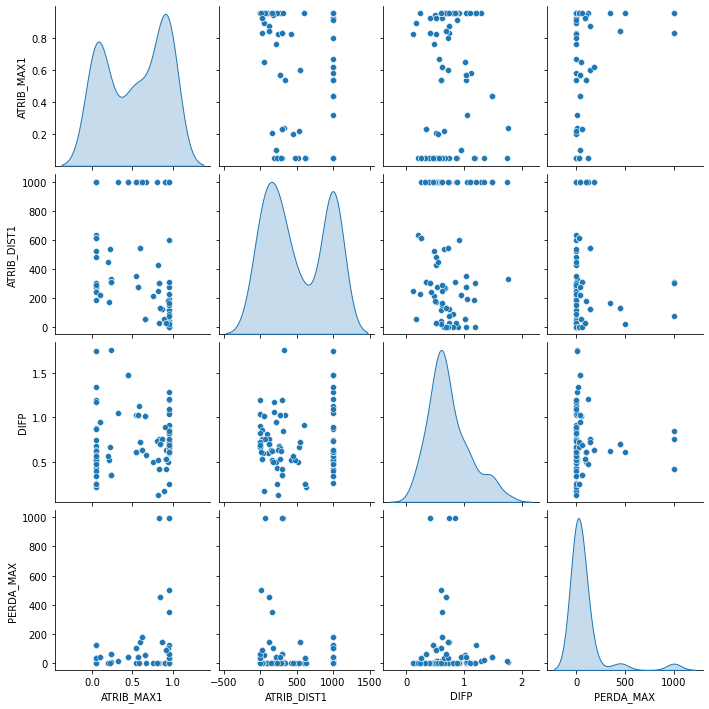

In [15]:
sns.pairplot(train_dataset[['ATRIB_MAX1', 'ATRIB_DIST1', 'DIFP', 'PERDA_MAX']], diag_kind='kde')

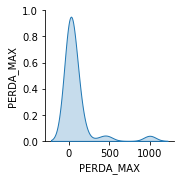

In [16]:
sns.pairplot(train_dataset[['PERDA_MAX']], diag_kind='kde')

In [17]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ATRIB_MAX1,120.0,0.531250,0.372036,0.050,0.0500,0.570,0.925,0.95
ATRIB_DIST1,120.0,511.076250,408.737878,0.000,127.0000,317.115,1000.000,1000.00
DIFP,120.0,0.738725,0.350661,0.125,0.5225,0.655,0.922,1.77
MGP1,120.0,0.308333,0.463741,0.000,0.0000,0.000,1.000,1.00
MGP2,120.0,0.766667,0.424726,0.000,1.0000,1.000,1.000,1.00
MGP3,120.0,0.200000,0.401677,0.000,0.0000,0.000,0.000,1.00
MGP4,120.0,0.741667,0.439554,0.000,0.0000,1.000,1.000,1.00
MGP5,120.0,0.441667,0.498668,0.000,0.0000,0.000,1.000,1.00
MGP6,120.0,0.300000,0.460179,0.000,0.0000,0.000,1.000,1.00
MGP7,120.0,0.116667,0.322369,0.000,0.0000,0.000,0.000,1.00


## Split features from labels

Separate the target value, the "label", from the features. This label is the value that you will train the model to predict.

In [18]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('PERDA_MAX')
test_labels = test_features.pop('PERDA_MAX')

## Normalization

In the table of statistics it's easy to see how different the ranges of each feature are.

In [19]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
ATRIB_MAX1,0.531250,0.372036
ATRIB_DIST1,511.076250,408.737878
DIFP,0.738725,0.350661
MGP1,0.308333,0.463741
MGP2,0.766667,0.424726
MGP3,0.200000,0.401677
MGP4,0.741667,0.439554
MGP5,0.441667,0.498668
MGP6,0.300000,0.460179
MGP7,0.116667,0.322369


Note: There is no advantage to normalizing the one-hot features, it is done here for simplicity.

## The Normalization layer
The preprocessing.Normalization layer is a clean and simple way to build that preprocessing into model.

Create the layer:

In [20]:
normalizer = preprocessing.Normalization(axis=-1)

In [21]:
# Then .adapt() it to the data:
normalizer.adapt(np.array(train_features))

In [22]:
# This calculates the mean and variance, and stores them in the layer.
print(normalizer.mean.numpy())

[5.3125000e-01 5.1107626e+02 7.3872501e-01 3.0833334e-01 7.6666665e-01
 2.0000000e-01 7.4166667e-01 4.4166666e-01 3.0000001e-01 1.1666667e-01
 4.4166666e-01 8.3333331e-01 5.9166664e-01 7.5000000e-01 7.5833333e-01
 3.0000001e-01 8.1666666e-01]


In [23]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[   0.95 1000.      1.29    0.      1.      0.      1.      0.      1.
     1.      0.      1.      1.      1.      1.      0.      1.  ]]

Normalized: [[ 1.13  1.2   1.58 -0.67  0.55 -0.5   0.59 -0.89  1.53  2.75 -0.89  0.45
   0.83  0.58  0.56 -0.65  0.47]]


I am not using the normalization layer

In [24]:
def build_and_compile_model(hidden_neurons = [64], hidden_activation = ['relu'], 
                            lr = 0.001, n_input = 1, n_output = 1):
    model = Sequential()
    model.add(normalizer)
    model.add(Dense(hidden_neurons[0], input_dim=n_input, activation='relu'))
    for i in range(1,len(hidden_neurons)):
        model.add(Dense(hidden_neurons[i], input_dim=hidden_neurons[i-1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_output))
    
    opt = Adam(lr=lr)
        
    model.compile(loss='mean_absolute_error', optimizer=opt)
    
    return model

In [25]:
dnn_model = build_and_compile_model(hidden_neurons=[50,50,32], n_input=train_features.shape[1])

In [26]:
#dnn_model.summary()

In [27]:
%%time
history = dnn_model.fit(
    np.array(train_features), np.array(train_labels),
    validation_split=0.2,
    verbose=1, epochs=20000)

Train on 96 samples, validate on 24 samples
Epoch 1/20000
96/96 [==============================] - 1s 8ms/sample - loss: 49.7443 - val_loss: 212.5235
Epoch 2/20000
96/96 [==============================] - 0s 125us/sample - loss: 49.6075 - val_loss: 212.3396
Epoch 3/20000
96/96 [==============================] - 0s 125us/sample - loss: 49.5081 - val_loss: 212.1706
Epoch 4/20000
96/96 [==============================] - 0s 125us/sample - loss: 49.5058 - val_loss: 212.0234
Epoch 5/20000
96/96 [==============================] - 0s 135us/sample - loss: 49.4335 - val_loss: 211.9023
Epoch 6/20000
96/96 [==============================] - 0s 135us/sample - loss: 49.3942 - val_loss: 211.7998
Epoch 7/20000
96/96 [==============================] - 0s 115us/sample - loss: 49.3814 - val_loss: 211.7121
Epoch 8/20000
96/96 [==============================] - 0s 135us/sample - loss: 49.3954 - val_loss: 211.6215
Epoch 9/20000
96/96 [==============================] - 0s 125us/sample - loss: 49.2183 - val_l

Epoch 76/20000
96/96 [==============================] - 0s 125us/sample - loss: 38.8463 - val_loss: 178.7399
Epoch 77/20000
96/96 [==============================] - 0s 125us/sample - loss: 38.2108 - val_loss: 178.3116
Epoch 78/20000
96/96 [==============================] - 0s 125us/sample - loss: 38.3110 - val_loss: 177.6291
Epoch 79/20000
96/96 [==============================] - 0s 104us/sample - loss: 38.6435 - val_loss: 176.7179
Epoch 80/20000
96/96 [==============================] - 0s 125us/sample - loss: 39.0524 - val_loss: 175.8121
Epoch 81/20000
96/96 [==============================] - 0s 125us/sample - loss: 37.6889 - val_loss: 175.3391
Epoch 82/20000
96/96 [==============================] - 0s 115us/sample - loss: 37.6444 - val_loss: 175.5475
Epoch 83/20000
96/96 [==============================] - 0s 104us/sample - loss: 37.8478 - val_loss: 175.6361
Epoch 84/20000
96/96 [==============================] - 0s 125us/sample - loss: 37.5740 - val_loss: 175.8596
Epoch 85/20000
96/9

96/96 [==============================] - 0s 115us/sample - loss: 31.7456 - val_loss: 138.6007
Epoch 151/20000
96/96 [==============================] - 0s 125us/sample - loss: 32.8253 - val_loss: 137.7167
Epoch 152/20000
96/96 [==============================] - 0s 125us/sample - loss: 30.9863 - val_loss: 138.0476
Epoch 153/20000
96/96 [==============================] - 0s 115us/sample - loss: 32.2222 - val_loss: 138.6782
Epoch 154/20000
96/96 [==============================] - 0s 115us/sample - loss: 31.6036 - val_loss: 137.7019
Epoch 155/20000
96/96 [==============================] - 0s 125us/sample - loss: 30.0187 - val_loss: 136.6916
Epoch 156/20000
96/96 [==============================] - 0s 125us/sample - loss: 31.2862 - val_loss: 134.7187
Epoch 157/20000
96/96 [==============================] - 0s 115us/sample - loss: 30.4411 - val_loss: 134.0791
Epoch 158/20000
96/96 [==============================] - 0s 125us/sample - loss: 29.1928 - val_loss: 133.7088
Epoch 159/20000
96/96 [===

Epoch 225/20000
96/96 [==============================] - 0s 115us/sample - loss: 23.4489 - val_loss: 91.6368
Epoch 226/20000
96/96 [==============================] - 0s 135us/sample - loss: 21.3282 - val_loss: 92.8260
Epoch 227/20000
96/96 [==============================] - 0s 146us/sample - loss: 24.2385 - val_loss: 94.4139
Epoch 228/20000
96/96 [==============================] - 0s 135us/sample - loss: 26.1244 - val_loss: 95.9449
Epoch 229/20000
96/96 [==============================] - 0s 146us/sample - loss: 24.8400 - val_loss: 94.6762
Epoch 230/20000
96/96 [==============================] - 0s 135us/sample - loss: 24.8756 - val_loss: 93.3775
Epoch 231/20000
96/96 [==============================] - 0s 115us/sample - loss: 25.0599 - val_loss: 92.6179
Epoch 232/20000
96/96 [==============================] - 0s 135us/sample - loss: 24.7157 - val_loss: 92.6185
Epoch 233/20000
96/96 [==============================] - 0s 135us/sample - loss: 25.0846 - val_loss: 91.5969
Epoch 234/20000
96/

96/96 [==============================] - 0s 135us/sample - loss: 21.5348 - val_loss: 101.3711
Epoch 301/20000
96/96 [==============================] - 0s 146us/sample - loss: 19.1014 - val_loss: 101.5041
Epoch 302/20000
96/96 [==============================] - 0s 146us/sample - loss: 20.8604 - val_loss: 103.1568
Epoch 303/20000
96/96 [==============================] - 0s 135us/sample - loss: 21.6084 - val_loss: 103.6315
Epoch 304/20000
96/96 [==============================] - 0s 135us/sample - loss: 20.8972 - val_loss: 102.4542
Epoch 305/20000
96/96 [==============================] - 0s 146us/sample - loss: 25.9149 - val_loss: 102.3196
Epoch 306/20000
96/96 [==============================] - 0s 125us/sample - loss: 23.4257 - val_loss: 101.7434
Epoch 307/20000
96/96 [==============================] - 0s 125us/sample - loss: 21.9076 - val_loss: 100.9410
Epoch 308/20000
96/96 [==============================] - 0s 146us/sample - loss: 20.8863 - val_loss: 101.1060
Epoch 309/20000
96/96 [===

96/96 [==============================] - 0s 135us/sample - loss: 26.4131 - val_loss: 99.8922
Epoch 375/20000
96/96 [==============================] - 0s 115us/sample - loss: 20.6763 - val_loss: 99.6778
Epoch 376/20000
96/96 [==============================] - 0s 115us/sample - loss: 24.8790 - val_loss: 99.5647
Epoch 377/20000
96/96 [==============================] - 0s 104us/sample - loss: 20.9365 - val_loss: 99.5694
Epoch 378/20000
96/96 [==============================] - 0s 135us/sample - loss: 22.6899 - val_loss: 99.8773
Epoch 379/20000
96/96 [==============================] - 0s 125us/sample - loss: 19.2761 - val_loss: 100.7124
Epoch 380/20000
96/96 [==============================] - 0s 115us/sample - loss: 18.2764 - val_loss: 101.6554
Epoch 381/20000
96/96 [==============================] - 0s 125us/sample - loss: 19.9620 - val_loss: 102.2797
Epoch 382/20000
96/96 [==============================] - 0s 115us/sample - loss: 18.9487 - val_loss: 102.8479
Epoch 383/20000
96/96 [========

Epoch 449/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.8650 - val_loss: 103.9059
Epoch 450/20000
96/96 [==============================] - 0s 115us/sample - loss: 19.8824 - val_loss: 104.0076
Epoch 451/20000
96/96 [==============================] - 0s 115us/sample - loss: 19.6819 - val_loss: 104.0541
Epoch 452/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.8643 - val_loss: 104.2567
Epoch 453/20000
96/96 [==============================] - 0s 135us/sample - loss: 18.7370 - val_loss: 103.8596
Epoch 454/20000
96/96 [==============================] - 0s 104us/sample - loss: 17.3065 - val_loss: 103.6521
Epoch 455/20000
96/96 [==============================] - 0s 125us/sample - loss: 18.7479 - val_loss: 103.0979
Epoch 456/20000
96/96 [==============================] - 0s 125us/sample - loss: 20.7766 - val_loss: 102.5153
Epoch 457/20000
96/96 [==============================] - 0s 115us/sample - loss: 18.1891 - val_loss: 102.0432
Epoch 458/

Epoch 524/20000
96/96 [==============================] - 0s 125us/sample - loss: 18.6219 - val_loss: 95.8858
Epoch 525/20000
96/96 [==============================] - 0s 135us/sample - loss: 17.4529 - val_loss: 97.6076
Epoch 526/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.2422 - val_loss: 97.2216
Epoch 527/20000
96/96 [==============================] - 0s 104us/sample - loss: 21.5339 - val_loss: 97.1810
Epoch 528/20000
96/96 [==============================] - 0s 125us/sample - loss: 19.7440 - val_loss: 98.2424
Epoch 529/20000
96/96 [==============================] - 0s 125us/sample - loss: 20.5012 - val_loss: 97.9723
Epoch 530/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.2895 - val_loss: 97.0275
Epoch 531/20000
96/96 [==============================] - 0s 104us/sample - loss: 21.7715 - val_loss: 96.8215
Epoch 532/20000
96/96 [==============================] - 0s 125us/sample - loss: 18.4811 - val_loss: 96.8878
Epoch 533/20000
96/

96/96 [==============================] - 0s 115us/sample - loss: 19.5608 - val_loss: 92.5842
Epoch 600/20000
96/96 [==============================] - 0s 135us/sample - loss: 21.1606 - val_loss: 93.1851
Epoch 601/20000
96/96 [==============================] - 0s 135us/sample - loss: 20.6921 - val_loss: 93.8726
Epoch 602/20000
96/96 [==============================] - 0s 115us/sample - loss: 19.3494 - val_loss: 94.2842
Epoch 603/20000
96/96 [==============================] - 0s 115us/sample - loss: 23.4285 - val_loss: 92.6727
Epoch 604/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.9798 - val_loss: 90.8558
Epoch 605/20000
96/96 [==============================] - 0s 115us/sample - loss: 21.4648 - val_loss: 92.0558
Epoch 606/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.8559 - val_loss: 92.2512
Epoch 607/20000
96/96 [==============================] - 0s 125us/sample - loss: 24.3181 - val_loss: 92.5464
Epoch 608/20000
96/96 [============

96/96 [==============================] - 0s 125us/sample - loss: 14.3765 - val_loss: 94.1223
Epoch 675/20000
96/96 [==============================] - 0s 146us/sample - loss: 23.3268 - val_loss: 93.4355
Epoch 676/20000
96/96 [==============================] - 0s 146us/sample - loss: 17.5810 - val_loss: 92.4917
Epoch 677/20000
96/96 [==============================] - 0s 135us/sample - loss: 17.6572 - val_loss: 91.7913
Epoch 678/20000
96/96 [==============================] - 0s 135us/sample - loss: 19.4519 - val_loss: 91.3014
Epoch 679/20000
96/96 [==============================] - 0s 146us/sample - loss: 17.3042 - val_loss: 90.3586
Epoch 680/20000
96/96 [==============================] - 0s 115us/sample - loss: 20.0366 - val_loss: 90.1468
Epoch 681/20000
96/96 [==============================] - 0s 135us/sample - loss: 21.2840 - val_loss: 90.2366
Epoch 682/20000
96/96 [==============================] - 0s 156us/sample - loss: 16.5766 - val_loss: 90.4804
Epoch 683/20000
96/96 [============

96/96 [==============================] - 0s 135us/sample - loss: 18.0382 - val_loss: 88.4644
Epoch 750/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.5066 - val_loss: 88.5931
Epoch 751/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.7667 - val_loss: 89.2327
Epoch 752/20000
96/96 [==============================] - 0s 135us/sample - loss: 18.7113 - val_loss: 89.5295
Epoch 753/20000
96/96 [==============================] - 0s 146us/sample - loss: 15.5916 - val_loss: 89.5638
Epoch 754/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.5180 - val_loss: 89.2239
Epoch 755/20000
96/96 [==============================] - 0s 135us/sample - loss: 17.2774 - val_loss: 90.2708
Epoch 756/20000
96/96 [==============================] - 0s 115us/sample - loss: 22.1470 - val_loss: 91.1219
Epoch 757/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5129 - val_loss: 91.2238
Epoch 758/20000
96/96 [============

96/96 [==============================] - 0s 125us/sample - loss: 14.2248 - val_loss: 83.2142
Epoch 825/20000
96/96 [==============================] - 0s 135us/sample - loss: 17.6844 - val_loss: 85.3130
Epoch 826/20000
96/96 [==============================] - 0s 125us/sample - loss: 18.4072 - val_loss: 85.2931
Epoch 827/20000
96/96 [==============================] - 0s 104us/sample - loss: 19.3388 - val_loss: 86.0860
Epoch 828/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.9397 - val_loss: 87.1726
Epoch 829/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.1481 - val_loss: 86.9788
Epoch 830/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.6594 - val_loss: 86.1700
Epoch 831/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.5902 - val_loss: 85.9362
Epoch 832/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.3682 - val_loss: 86.0956
Epoch 833/20000
96/96 [============

96/96 [==============================] - 0s 115us/sample - loss: 18.2362 - val_loss: 83.9371
Epoch 900/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.6638 - val_loss: 82.7642
Epoch 901/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.1029 - val_loss: 81.6972
Epoch 902/20000
96/96 [==============================] - 0s 125us/sample - loss: 21.3734 - val_loss: 81.5080
Epoch 903/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.5394 - val_loss: 81.9652
Epoch 904/20000
96/96 [==============================] - 0s 135us/sample - loss: 16.2483 - val_loss: 81.9605
Epoch 905/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.9701 - val_loss: 81.7890
Epoch 906/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.9492 - val_loss: 81.1057
Epoch 907/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.5069 - val_loss: 81.7022
Epoch 908/20000
96/96 [============

96/96 [==============================] - 0s 125us/sample - loss: 17.6721 - val_loss: 85.8969
Epoch 975/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.8450 - val_loss: 87.4770
Epoch 976/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.1291 - val_loss: 89.3684
Epoch 977/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.9414 - val_loss: 91.2441
Epoch 978/20000
96/96 [==============================] - 0s 115us/sample - loss: 17.1952 - val_loss: 91.5156
Epoch 979/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.6820 - val_loss: 90.3524
Epoch 980/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.2179 - val_loss: 85.8582
Epoch 981/20000
96/96 [==============================] - 0s 104us/sample - loss: 13.1365 - val_loss: 86.2439
Epoch 982/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.4804 - val_loss: 85.2518
Epoch 983/20000
96/96 [============

Epoch 1049/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.0879 - val_loss: 84.8372
Epoch 1050/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6298 - val_loss: 84.8857
Epoch 1051/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.3755 - val_loss: 83.8841
Epoch 1052/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.9771 - val_loss: 81.3343
Epoch 1053/20000
96/96 [==============================] - 0s 104us/sample - loss: 11.9304 - val_loss: 80.5175
Epoch 1054/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.9418 - val_loss: 81.0872
Epoch 1055/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7369 - val_loss: 81.7641
Epoch 1056/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.5291 - val_loss: 82.5130
Epoch 1057/20000
96/96 [==============================] - 0s 104us/sample - loss: 11.5110 - val_loss: 81.5364
Epoch 1058

96/96 [==============================] - 0s 146us/sample - loss: 15.6908 - val_loss: 73.4299
Epoch 1124/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.2071 - val_loss: 73.0536
Epoch 1125/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.4177 - val_loss: 73.2371
Epoch 1126/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3107 - val_loss: 75.3541
Epoch 1127/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.3730 - val_loss: 79.9008
Epoch 1128/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.4389 - val_loss: 82.2930
Epoch 1129/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.6801 - val_loss: 80.7834
Epoch 1130/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.9638 - val_loss: 78.5237
Epoch 1131/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.7884 - val_loss: 76.3800
Epoch 1132/20000
96/96 [====

96/96 [==============================] - 0s 135us/sample - loss: 15.7004 - val_loss: 73.4755
Epoch 1198/20000
96/96 [==============================] - 0s 167us/sample - loss: 19.5374 - val_loss: 74.2092
Epoch 1199/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.7451 - val_loss: 75.5392
Epoch 1200/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.1729 - val_loss: 73.8822
Epoch 1201/20000
96/96 [==============================] - 0s 104us/sample - loss: 13.4580 - val_loss: 71.7553
Epoch 1202/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.5139 - val_loss: 70.1630
Epoch 1203/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.0691 - val_loss: 68.6729
Epoch 1204/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6805 - val_loss: 69.8644
Epoch 1205/20000
96/96 [==============================] - 0s 104us/sample - loss: 9.9509 - val_loss: 70.2843
Epoch 1206/20000
96/96 [====

Epoch 1272/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.0241 - val_loss: 66.9909
Epoch 1273/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.5229 - val_loss: 68.6703
Epoch 1274/20000
96/96 [==============================] - 0s 135us/sample - loss: 16.9756 - val_loss: 68.8228
Epoch 1275/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.6540 - val_loss: 69.3812
Epoch 1276/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.5766 - val_loss: 70.0988
Epoch 1277/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.0732 - val_loss: 68.2972
Epoch 1278/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.6344 - val_loss: 67.5219
Epoch 1279/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.7203 - val_loss: 70.1863
Epoch 1280/20000
96/96 [==============================] - 0s 135us/sample - loss: 16.2728 - val_loss: 74.5908
Epoch 1281/20

96/96 [==============================] - 0s 125us/sample - loss: 9.3870 - val_loss: 69.5698
Epoch 1347/20000
96/96 [==============================] - 0s 104us/sample - loss: 10.2878 - val_loss: 72.4178
Epoch 1348/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.2793 - val_loss: 74.2406
Epoch 1349/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.7221 - val_loss: 72.9703
Epoch 1350/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.5644 - val_loss: 69.8945
Epoch 1351/20000
96/96 [==============================] - 0s 104us/sample - loss: 10.4072 - val_loss: 69.4293
Epoch 1352/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.3122 - val_loss: 69.6998
Epoch 1353/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8012 - val_loss: 69.3883
Epoch 1354/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.6654 - val_loss: 67.9730
Epoch 1355/20000
96/96 [======

Epoch 1421/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.6568 - val_loss: 67.4093
Epoch 1422/20000
96/96 [==============================] - 0s 156us/sample - loss: 12.1292 - val_loss: 68.3610
Epoch 1423/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.7663 - val_loss: 68.3516
Epoch 1424/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.5298 - val_loss: 68.5689
Epoch 1425/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.0042 - val_loss: 68.2565
Epoch 1426/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.5745 - val_loss: 67.2472
Epoch 1427/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.1564 - val_loss: 67.9997
Epoch 1428/20000
96/96 [==============================] - 0s 188us/sample - loss: 11.3755 - val_loss: 68.5563
Epoch 1429/20000
96/96 [==============================] - 0s 167us/sample - loss: 14.3939 - val_loss: 67.1096
Epoch 1430

96/96 [==============================] - 0s 135us/sample - loss: 14.3801 - val_loss: 66.6308
Epoch 1496/20000
96/96 [==============================] - 0s 167us/sample - loss: 15.0457 - val_loss: 66.4790
Epoch 1497/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.1017 - val_loss: 67.1764
Epoch 1498/20000
96/96 [==============================] - 0s 167us/sample - loss: 12.4737 - val_loss: 66.1099
Epoch 1499/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.8908 - val_loss: 67.5722
Epoch 1500/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.1914 - val_loss: 68.8986
Epoch 1501/20000
96/96 [==============================] - 0s 136us/sample - loss: 11.4900 - val_loss: 67.6440
Epoch 1502/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.0760 - val_loss: 66.8075
Epoch 1503/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.8115 - val_loss: 67.3954
Epoch 1504/20000
96/96 [===

96/96 [==============================] - 0s 115us/sample - loss: 10.7778 - val_loss: 72.3284
Epoch 1570/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.6032 - val_loss: 70.8931
Epoch 1571/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.6817 - val_loss: 68.4929
Epoch 1572/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.8118 - val_loss: 68.7688
Epoch 1573/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.4063 - val_loss: 72.7324
Epoch 1574/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.8830 - val_loss: 75.7323
Epoch 1575/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.4455 - val_loss: 77.7476
Epoch 1576/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.1157 - val_loss: 75.6541
Epoch 1577/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.6186 - val_loss: 76.0238
Epoch 1578/20000
96/96 [====

96/96 [==============================] - 0s 115us/sample - loss: 13.5594 - val_loss: 69.9584
Epoch 1644/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.0300 - val_loss: 69.1060
Epoch 1645/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.5186 - val_loss: 68.6912
Epoch 1646/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.7501 - val_loss: 67.0773
Epoch 1647/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.1639 - val_loss: 67.8341
Epoch 1648/20000
96/96 [==============================] - 0s 146us/sample - loss: 7.2637 - val_loss: 68.2487
Epoch 1649/20000
96/96 [==============================] - 0s 167us/sample - loss: 12.2319 - val_loss: 68.5704
Epoch 1650/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.0461 - val_loss: 68.1350
Epoch 1651/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.1470 - val_loss: 68.3563
Epoch 1652/20000
96/96 [=====

Epoch 1718/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.8609 - val_loss: 71.2710
Epoch 1719/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.1365 - val_loss: 69.6442
Epoch 1720/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.7251 - val_loss: 69.1870
Epoch 1721/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7846 - val_loss: 69.3206
Epoch 1722/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.6230 - val_loss: 72.8950
Epoch 1723/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.8290 - val_loss: 74.7349
Epoch 1724/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.8155 - val_loss: 75.8787
Epoch 1725/20000
96/96 [==============================] - 0s 104us/sample - loss: 13.5749 - val_loss: 74.3294
Epoch 1726/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.9645 - val_loss: 72.1445
Epoch 1727/20

96/96 [==============================] - 0s 125us/sample - loss: 11.7989 - val_loss: 67.8872
Epoch 1793/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1116 - val_loss: 67.7880
Epoch 1794/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.5702 - val_loss: 68.9030
Epoch 1795/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.2303 - val_loss: 68.8150
Epoch 1796/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.1545 - val_loss: 67.1820
Epoch 1797/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.1822 - val_loss: 66.4633
Epoch 1798/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.4924 - val_loss: 68.1204
Epoch 1799/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.0801 - val_loss: 68.9610
Epoch 1800/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.7174 - val_loss: 68.2728
Epoch 1801/20000
96/96 [====

96/96 [==============================] - 0s 125us/sample - loss: 8.4317 - val_loss: 66.4814
Epoch 1867/20000
96/96 [==============================] - 0s 115us/sample - loss: 6.8363 - val_loss: 66.7185
Epoch 1868/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.4926 - val_loss: 66.7442
Epoch 1869/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.6812 - val_loss: 66.4808
Epoch 1870/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.2987 - val_loss: 67.0447
Epoch 1871/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.2076 - val_loss: 69.5404
Epoch 1872/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.5698 - val_loss: 72.6635
Epoch 1873/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.7025 - val_loss: 72.7538
Epoch 1874/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.7241 - val_loss: 73.4775
Epoch 1875/20000
96/96 [======

Epoch 1941/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.2717 - val_loss: 66.2503
Epoch 1942/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.2976 - val_loss: 66.9855
Epoch 1943/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.4744 - val_loss: 68.4803
Epoch 1944/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.1775 - val_loss: 69.5092
Epoch 1945/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.2089 - val_loss: 67.3883
Epoch 1946/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.7195 - val_loss: 66.6170
Epoch 1947/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.0104 - val_loss: 66.7129
Epoch 1948/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.1518 - val_loss: 65.6428
Epoch 1949/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1543 - val_loss: 65.3597
Epoch 1950

96/96 [==============================] - 0s 115us/sample - loss: 17.7337 - val_loss: 71.7560
Epoch 2016/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.8164 - val_loss: 68.8184
Epoch 2017/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.3374 - val_loss: 67.0191
Epoch 2018/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.3774 - val_loss: 65.4549
Epoch 2019/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.7283 - val_loss: 65.5104
Epoch 2020/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7502 - val_loss: 66.3955
Epoch 2021/20000
96/96 [==============================] - 0s 104us/sample - loss: 9.3730 - val_loss: 66.4842
Epoch 2022/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.4143 - val_loss: 66.2253
Epoch 2023/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.5156 - val_loss: 66.1379
Epoch 2024/20000
96/96 [======

Epoch 2090/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3443 - val_loss: 68.2280
Epoch 2091/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.0824 - val_loss: 67.5131
Epoch 2092/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.1787 - val_loss: 67.0007
Epoch 2093/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.1970 - val_loss: 67.5531
Epoch 2094/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.1062 - val_loss: 67.9671
Epoch 2095/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.8190 - val_loss: 68.3813
Epoch 2096/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.5891 - val_loss: 68.1608
Epoch 2097/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.9157 - val_loss: 68.0656
Epoch 2098/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.7929 - val_loss: 67.4799
Epoch 2099/200

96/96 [==============================] - 0s 125us/sample - loss: 14.0149 - val_loss: 69.4025
Epoch 2165/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.6639 - val_loss: 69.8361
Epoch 2166/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.9320 - val_loss: 67.8750
Epoch 2167/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.8295 - val_loss: 65.8673
Epoch 2168/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.5280 - val_loss: 67.0933
Epoch 2169/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.8325 - val_loss: 68.3791
Epoch 2170/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.1249 - val_loss: 68.0850
Epoch 2171/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.9237 - val_loss: 67.5989
Epoch 2172/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.3056 - val_loss: 66.7476
Epoch 2173/20000
96/96 [====

Epoch 2239/20000
96/96 [==============================] - 0s 104us/sample - loss: 13.3833 - val_loss: 70.7141
Epoch 2240/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.2517 - val_loss: 71.9613
Epoch 2241/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.2312 - val_loss: 71.4655
Epoch 2242/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.5731 - val_loss: 68.4324
Epoch 2243/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.7882 - val_loss: 67.0969
Epoch 2244/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3354 - val_loss: 68.0277
Epoch 2245/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.1021 - val_loss: 70.2305
Epoch 2246/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.2447 - val_loss: 69.5490
Epoch 2247/20000
96/96 [==============================] - 0s 104us/sample - loss: 8.6848 - val_loss: 67.1339
Epoch 2248/2

96/96 [==============================] - 0s 125us/sample - loss: 13.0044 - val_loss: 75.2839
Epoch 2314/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5846 - val_loss: 72.9682
Epoch 2315/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.9332 - val_loss: 71.7289
Epoch 2316/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.4800 - val_loss: 71.5008
Epoch 2317/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.1934 - val_loss: 68.8610
Epoch 2318/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.3852 - val_loss: 65.4701
Epoch 2319/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.9889 - val_loss: 63.8129
Epoch 2320/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.6830 - val_loss: 66.3677
Epoch 2321/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.6823 - val_loss: 66.4264
Epoch 2322/20000
96/96 [======

Epoch 2388/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.1426 - val_loss: 68.2238
Epoch 2389/20000
96/96 [==============================] - 0s 115us/sample - loss: 17.3111 - val_loss: 68.0515
Epoch 2390/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.6989 - val_loss: 66.0913
Epoch 2391/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.1906 - val_loss: 67.8504
Epoch 2392/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.9409 - val_loss: 68.9767
Epoch 2393/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.7380 - val_loss: 69.1002
Epoch 2394/20000
96/96 [==============================] - 0s 104us/sample - loss: 9.6322 - val_loss: 67.9695
Epoch 2395/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.5891 - val_loss: 66.5582
Epoch 2396/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.2463 - val_loss: 67.6531
Epoch 2397/

96/96 [==============================] - 0s 135us/sample - loss: 11.8161 - val_loss: 73.6164
Epoch 2463/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.0630 - val_loss: 70.5655
Epoch 2464/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.2936 - val_loss: 68.4018
Epoch 2465/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.9004 - val_loss: 66.8713
Epoch 2466/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.2106 - val_loss: 67.3094
Epoch 2467/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3376 - val_loss: 67.6171
Epoch 2468/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.3655 - val_loss: 66.4971
Epoch 2469/20000
96/96 [==============================] - 0s 115us/sample - loss: 19.1104 - val_loss: 66.0031
Epoch 2470/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.2566 - val_loss: 66.1326
Epoch 2471/20000
96/96 [===

Epoch 2537/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.9020 - val_loss: 68.7275
Epoch 2538/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.2452 - val_loss: 73.6376
Epoch 2539/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.8401 - val_loss: 75.6529
Epoch 2540/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8316 - val_loss: 72.9856
Epoch 2541/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1127 - val_loss: 71.8455
Epoch 2542/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.3236 - val_loss: 73.8980
Epoch 2543/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.2499 - val_loss: 75.0467
Epoch 2544/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.0915 - val_loss: 73.9972
Epoch 2545/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.2449 - val_loss: 71.8554
Epoch 2546/

96/96 [==============================] - 0s 125us/sample - loss: 15.9773 - val_loss: 66.0834
Epoch 2612/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.2783 - val_loss: 66.6422
Epoch 2613/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.4118 - val_loss: 67.5842
Epoch 2614/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.5592 - val_loss: 67.1096
Epoch 2615/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.1553 - val_loss: 68.1350
Epoch 2616/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.0024 - val_loss: 69.0937
Epoch 2617/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.3996 - val_loss: 67.5648
Epoch 2618/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.7088 - val_loss: 65.6706
Epoch 2619/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.8147 - val_loss: 65.8361
Epoch 2620/20000
96/96 [=====

Epoch 2686/20000
96/96 [==============================] - 0s 135us/sample - loss: 16.5335 - val_loss: 66.9607
Epoch 2687/20000
96/96 [==============================] - 0s 167us/sample - loss: 12.7950 - val_loss: 68.6859
Epoch 2688/20000
96/96 [==============================] - 0s 156us/sample - loss: 15.5925 - val_loss: 69.4325
Epoch 2689/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.0601 - val_loss: 68.1239
Epoch 2690/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.5035 - val_loss: 66.6892
Epoch 2691/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.6652 - val_loss: 66.6717
Epoch 2692/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.7440 - val_loss: 67.9191
Epoch 2693/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.5390 - val_loss: 67.9450
Epoch 2694/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.9950 - val_loss: 71.9297
Epoch 2695/

96/96 [==============================] - 0s 125us/sample - loss: 11.1773 - val_loss: 65.4382
Epoch 2761/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.0401 - val_loss: 65.0512
Epoch 2762/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.8058 - val_loss: 66.9645
Epoch 2763/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.3133 - val_loss: 65.8557
Epoch 2764/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.9841 - val_loss: 64.1969
Epoch 2765/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.8413 - val_loss: 64.1217
Epoch 2766/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5827 - val_loss: 65.7383
Epoch 2767/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.8564 - val_loss: 66.5798
Epoch 2768/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.6072 - val_loss: 67.6538
Epoch 2769/20000
96/96 [====

96/96 [==============================] - 0s 115us/sample - loss: 14.9401 - val_loss: 65.1054
Epoch 2835/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.8016 - val_loss: 66.6218
Epoch 2836/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.2846 - val_loss: 70.4316
Epoch 2837/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.6347 - val_loss: 72.1201
Epoch 2838/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.9172 - val_loss: 71.3175
Epoch 2839/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.7361 - val_loss: 69.8700
Epoch 2840/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.8678 - val_loss: 68.6220
Epoch 2841/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.6476 - val_loss: 67.9259
Epoch 2842/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.7303 - val_loss: 66.1522
Epoch 2843/20000
96/96 [===

Epoch 2909/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.7100 - val_loss: 70.2077
Epoch 2910/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.7577 - val_loss: 73.2465
Epoch 2911/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.4424 - val_loss: 76.5531
Epoch 2912/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.6976 - val_loss: 75.1107
Epoch 2913/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.3467 - val_loss: 72.2387
Epoch 2914/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3527 - val_loss: 71.4585
Epoch 2915/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.3894 - val_loss: 71.1676
Epoch 2916/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.9336 - val_loss: 72.0648
Epoch 2917/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.2821 - val_loss: 73.9704
Epoch 2918/20

96/96 [==============================] - 0s 125us/sample - loss: 13.2170 - val_loss: 70.1057
Epoch 2984/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.8615 - val_loss: 70.1477
Epoch 2985/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.7334 - val_loss: 68.4272
Epoch 2986/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8237 - val_loss: 66.6267
Epoch 2987/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.6069 - val_loss: 65.5917
Epoch 2988/20000
96/96 [==============================] - 0s 104us/sample - loss: 11.8869 - val_loss: 65.7716
Epoch 2989/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7486 - val_loss: 65.5829
Epoch 2990/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.4029 - val_loss: 64.3503
Epoch 2991/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3455 - val_loss: 64.6208
Epoch 2992/20000
96/96 [===

Epoch 3058/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.0922 - val_loss: 63.1964
Epoch 3059/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.1288 - val_loss: 64.9311
Epoch 3060/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.1294 - val_loss: 67.3484
Epoch 3061/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.2142 - val_loss: 70.3888
Epoch 3062/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.5236 - val_loss: 71.6469
Epoch 3063/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.2096 - val_loss: 68.7557
Epoch 3064/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.3595 - val_loss: 66.6883
Epoch 3065/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5880 - val_loss: 66.1811
Epoch 3066/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.2531 - val_loss: 66.3343
Epoch 3067/

96/96 [==============================] - 0s 135us/sample - loss: 9.7916 - val_loss: 69.4919
Epoch 3133/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.5478 - val_loss: 69.0097
Epoch 3134/20000
96/96 [==============================] - 0s 135us/sample - loss: 17.3846 - val_loss: 68.2023
Epoch 3135/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.5529 - val_loss: 70.4656
Epoch 3136/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.8487 - val_loss: 73.6990
Epoch 3137/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.9166 - val_loss: 74.4618
Epoch 3138/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.7217 - val_loss: 75.9359
Epoch 3139/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.2109 - val_loss: 76.0928
Epoch 3140/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.7162 - val_loss: 74.5427
Epoch 3141/20000
96/96 [=====

96/96 [==============================] - 0s 115us/sample - loss: 11.9823 - val_loss: 65.7470
Epoch 3207/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.4819 - val_loss: 67.8444
Epoch 3208/20000
96/96 [==============================] - 0s 167us/sample - loss: 8.9563 - val_loss: 71.3122
Epoch 3209/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.1309 - val_loss: 68.3461
Epoch 3210/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.1438 - val_loss: 66.0066
Epoch 3211/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.1542 - val_loss: 64.9785
Epoch 3212/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.8071 - val_loss: 64.5938
Epoch 3213/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.5164 - val_loss: 65.0376
Epoch 3214/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7933 - val_loss: 66.0171
Epoch 3215/20000
96/96 [======

Epoch 3281/20000
96/96 [==============================] - 0s 135us/sample - loss: 16.1197 - val_loss: 70.7812
Epoch 3282/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.7666 - val_loss: 70.3533
Epoch 3283/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.8796 - val_loss: 70.8978
Epoch 3284/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.1746 - val_loss: 72.5234
Epoch 3285/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5766 - val_loss: 70.7954
Epoch 3286/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.8346 - val_loss: 69.8089
Epoch 3287/20000
96/96 [==============================] - 0s 146us/sample - loss: 19.2090 - val_loss: 69.8204
Epoch 3288/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9017 - val_loss: 69.3659
Epoch 3289/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.4774 - val_loss: 69.0376
Epoch 3290/2

96/96 [==============================] - 0s 125us/sample - loss: 10.3568 - val_loss: 74.2217
Epoch 3356/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.3015 - val_loss: 78.4320
Epoch 3357/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8087 - val_loss: 75.8644
Epoch 3358/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.5625 - val_loss: 72.7539
Epoch 3359/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.6401 - val_loss: 73.1758
Epoch 3360/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.5213 - val_loss: 72.3833
Epoch 3361/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.2002 - val_loss: 72.1874
Epoch 3362/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.5457 - val_loss: 71.5354
Epoch 3363/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.8028 - val_loss: 72.1853
Epoch 3364/20000
96/96 [===

Epoch 3430/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.4351 - val_loss: 68.1817
Epoch 3431/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0178 - val_loss: 68.5029
Epoch 3432/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.8529 - val_loss: 67.5095
Epoch 3433/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7308 - val_loss: 66.3693
Epoch 3434/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.8024 - val_loss: 66.4854
Epoch 3435/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.6354 - val_loss: 67.8510
Epoch 3436/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.3845 - val_loss: 68.1786
Epoch 3437/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.5557 - val_loss: 67.9891
Epoch 3438/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.5177 - val_loss: 67.8086
Epoch 3439/2

96/96 [==============================] - 0s 125us/sample - loss: 12.4122 - val_loss: 70.5327
Epoch 3505/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.2781 - val_loss: 68.5780
Epoch 3506/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.6890 - val_loss: 68.4626
Epoch 3507/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.5061 - val_loss: 67.8120
Epoch 3508/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1919 - val_loss: 67.6492
Epoch 3509/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.0774 - val_loss: 67.8354
Epoch 3510/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.7971 - val_loss: 69.8330
Epoch 3511/20000
96/96 [==============================] - 0s 104us/sample - loss: 8.6028 - val_loss: 70.0239
Epoch 3512/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.3913 - val_loss: 68.2208
Epoch 3513/20000
96/96 [=====

96/96 [==============================] - 0s 125us/sample - loss: 11.7666 - val_loss: 66.6303
Epoch 3579/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.2966 - val_loss: 69.5111
Epoch 3580/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.2289 - val_loss: 69.3803
Epoch 3581/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.8861 - val_loss: 68.4450
Epoch 3582/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.8555 - val_loss: 69.4787
Epoch 3583/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5362 - val_loss: 70.2118
Epoch 3584/20000
96/96 [==============================] - 0s 104us/sample - loss: 15.2963 - val_loss: 71.6132
Epoch 3585/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.3969 - val_loss: 71.8792
Epoch 3586/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.6853 - val_loss: 71.9181
Epoch 3587/20000
96/96 [====

Epoch 3653/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.5978 - val_loss: 72.7996
Epoch 3654/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.7819 - val_loss: 74.3356
Epoch 3655/20000
96/96 [==============================] - 0s 146us/sample - loss: 16.8672 - val_loss: 73.0819
Epoch 3656/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.6828 - val_loss: 72.8598
Epoch 3657/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7707 - val_loss: 73.8118
Epoch 3658/20000
96/96 [==============================] - 0s 104us/sample - loss: 12.4099 - val_loss: 73.4985
Epoch 3659/20000
96/96 [==============================] - 0s 135us/sample - loss: 18.8465 - val_loss: 72.5577
Epoch 3660/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.9557 - val_loss: 70.8381
Epoch 3661/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.8735 - val_loss: 70.1219
Epoch 3662/20

96/96 [==============================] - 0s 125us/sample - loss: 14.3128 - val_loss: 73.7760
Epoch 3728/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.3365 - val_loss: 73.3325
Epoch 3729/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.8312 - val_loss: 72.1916
Epoch 3730/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.5587 - val_loss: 72.2845
Epoch 3731/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.8708 - val_loss: 70.6620
Epoch 3732/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.7072 - val_loss: 67.5634
Epoch 3733/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3689 - val_loss: 66.7850
Epoch 3734/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.2782 - val_loss: 68.1607
Epoch 3735/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.5343 - val_loss: 67.2400
Epoch 3736/20000
96/96 [=====

Epoch 3802/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.5944 - val_loss: 65.8750
Epoch 3803/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.2785 - val_loss: 65.3812
Epoch 3804/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.1824 - val_loss: 64.5756
Epoch 3805/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.9623 - val_loss: 66.9241
Epoch 3806/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.5051 - val_loss: 69.3562
Epoch 3807/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.9805 - val_loss: 68.1836
Epoch 3808/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.0488 - val_loss: 68.1660
Epoch 3809/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.2652 - val_loss: 69.7561
Epoch 3810/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.7349 - val_loss: 73.1014
Epoch 3811/

96/96 [==============================] - 0s 135us/sample - loss: 8.8338 - val_loss: 67.5037
Epoch 3877/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.2176 - val_loss: 66.5197
Epoch 3878/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.3042 - val_loss: 65.6592
Epoch 3879/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.5486 - val_loss: 65.8043
Epoch 3880/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1589 - val_loss: 66.7567
Epoch 3881/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.6089 - val_loss: 66.8723
Epoch 3882/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8772 - val_loss: 68.6274
Epoch 3883/20000
96/96 [==============================] - 0s 146us/sample - loss: 7.9518 - val_loss: 69.9941
Epoch 3884/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.8414 - val_loss: 70.3340
Epoch 3885/20000
96/96 [======

Epoch 3951/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.2877 - val_loss: 66.7387
Epoch 3952/20000
96/96 [==============================] - 0s 156us/sample - loss: 16.9447 - val_loss: 65.4080
Epoch 3953/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.0433 - val_loss: 65.1611
Epoch 3954/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.0185 - val_loss: 64.8779
Epoch 3955/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.7176 - val_loss: 66.9370
Epoch 3956/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.2885 - val_loss: 67.3058
Epoch 3957/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.9782 - val_loss: 67.8230
Epoch 3958/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.2586 - val_loss: 67.2059
Epoch 3959/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.4731 - val_loss: 67.7951
Epoch 3960/

96/96 [==============================] - 0s 115us/sample - loss: 17.4288 - val_loss: 66.6197
Epoch 4026/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.9039 - val_loss: 68.1071
Epoch 4027/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.6725 - val_loss: 69.2771
Epoch 4028/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3072 - val_loss: 68.9842
Epoch 4029/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.7712 - val_loss: 67.3241
Epoch 4030/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.6816 - val_loss: 64.9691
Epoch 4031/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9241 - val_loss: 64.8280
Epoch 4032/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3463 - val_loss: 65.7697
Epoch 4033/20000
96/96 [==============================] - 0s 115us/sample - loss: 17.4083 - val_loss: 66.8387
Epoch 4034/20000
96/96 [=======

Epoch 4100/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.9489 - val_loss: 68.2573
Epoch 4101/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.7724 - val_loss: 65.8719
Epoch 4102/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.0636 - val_loss: 65.0851
Epoch 4103/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.6604 - val_loss: 66.0250
Epoch 4104/20000
96/96 [==============================] - 0s 104us/sample - loss: 10.2937 - val_loss: 66.5306
Epoch 4105/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5109 - val_loss: 67.1207
Epoch 4106/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.1485 - val_loss: 68.2697
Epoch 4107/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.6941 - val_loss: 67.9631
Epoch 4108/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.0618 - val_loss: 67.9749
Epoch 4109

96/96 [==============================] - 0s 125us/sample - loss: 10.6117 - val_loss: 64.7647
Epoch 4175/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3897 - val_loss: 65.0960
Epoch 4176/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3626 - val_loss: 66.5882
Epoch 4177/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.2364 - val_loss: 67.0416
Epoch 4178/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.5725 - val_loss: 65.6126
Epoch 4179/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.6378 - val_loss: 65.0915
Epoch 4180/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.3574 - val_loss: 64.9288
Epoch 4181/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5126 - val_loss: 67.5530
Epoch 4182/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.3191 - val_loss: 71.1790
Epoch 4183/20000
96/96 [====

Epoch 4249/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.3148 - val_loss: 66.6403
Epoch 4250/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.7791 - val_loss: 67.9398
Epoch 4251/20000
96/96 [==============================] - 0s 104us/sample - loss: 10.1371 - val_loss: 69.6954
Epoch 4252/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3631 - val_loss: 70.6641
Epoch 4253/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.6846 - val_loss: 70.6439
Epoch 4254/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0660 - val_loss: 68.2585
Epoch 4255/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.9295 - val_loss: 67.3812
Epoch 4256/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9727 - val_loss: 67.1223
Epoch 4257/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.3435 - val_loss: 66.8726
Epoch 4258/2

96/96 [==============================] - 0s 115us/sample - loss: 10.3268 - val_loss: 67.3849
Epoch 4324/20000
96/96 [==============================] - 0s 104us/sample - loss: 12.5634 - val_loss: 67.0179
Epoch 4325/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.6430 - val_loss: 67.6839
Epoch 4326/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.5188 - val_loss: 68.4082
Epoch 4327/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7216 - val_loss: 68.1549
Epoch 4328/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.2322 - val_loss: 67.7157
Epoch 4329/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.1301 - val_loss: 67.4248
Epoch 4330/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3965 - val_loss: 67.6756
Epoch 4331/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.4348 - val_loss: 68.8787
Epoch 4332/20000
96/96 [=====

Epoch 4398/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.9456 - val_loss: 68.5594
Epoch 4399/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3687 - val_loss: 67.8286
Epoch 4400/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.2504 - val_loss: 67.4733
Epoch 4401/20000
96/96 [==============================] - 0s 104us/sample - loss: 13.5402 - val_loss: 66.4367
Epoch 4402/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.9466 - val_loss: 67.8468
Epoch 4403/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.0882 - val_loss: 69.1418
Epoch 4404/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.6495 - val_loss: 65.9337
Epoch 4405/20000
96/96 [==============================] - 0s 104us/sample - loss: 12.3758 - val_loss: 64.8294
Epoch 4406/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5494 - val_loss: 65.9987
Epoch 4407/

96/96 [==============================] - 0s 135us/sample - loss: 9.1846 - val_loss: 67.2114
Epoch 4473/20000
96/96 [==============================] - 0s 104us/sample - loss: 17.6505 - val_loss: 65.9403
Epoch 4474/20000
96/96 [==============================] - 0s 146us/sample - loss: 15.8476 - val_loss: 64.8572
Epoch 4475/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.9823 - val_loss: 63.9540
Epoch 4476/20000
96/96 [==============================] - 0s 146us/sample - loss: 18.0140 - val_loss: 64.2956
Epoch 4477/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.0796 - val_loss: 66.8446
Epoch 4478/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.8325 - val_loss: 70.1464
Epoch 4479/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.1304 - val_loss: 72.5093
Epoch 4480/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.8533 - val_loss: 70.6108
Epoch 4481/20000
96/96 [=====

Epoch 4547/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.9202 - val_loss: 63.5854
Epoch 4548/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.8697 - val_loss: 64.0064
Epoch 4549/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.1455 - val_loss: 64.9051
Epoch 4550/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.8203 - val_loss: 66.5890
Epoch 4551/20000
96/96 [==============================] - 0s 104us/sample - loss: 13.6216 - val_loss: 66.8928
Epoch 4552/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.2151 - val_loss: 66.1367
Epoch 4553/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.9695 - val_loss: 64.3201
Epoch 4554/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9285 - val_loss: 64.5100
Epoch 4555/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.6046 - val_loss: 66.2173
Epoch 4556/20

96/96 [==============================] - 0s 115us/sample - loss: 14.5364 - val_loss: 66.7898
Epoch 4622/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.1342 - val_loss: 63.7769
Epoch 4623/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.9041 - val_loss: 63.2929
Epoch 4624/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.9250 - val_loss: 63.0159
Epoch 4625/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.4188 - val_loss: 63.6080
Epoch 4626/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8014 - val_loss: 65.4898
Epoch 4627/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6288 - val_loss: 64.8490
Epoch 4628/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.4393 - val_loss: 63.7840
Epoch 4629/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.3494 - val_loss: 64.0261
Epoch 4630/20000
96/96 [===

Epoch 4696/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.2668 - val_loss: 70.5186
Epoch 4697/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.4044 - val_loss: 69.9124
Epoch 4698/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.8718 - val_loss: 69.3630
Epoch 4699/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.9674 - val_loss: 67.7039
Epoch 4700/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.0812 - val_loss: 67.3105
Epoch 4701/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.5774 - val_loss: 67.1442
Epoch 4702/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.6771 - val_loss: 67.7383
Epoch 4703/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.1446 - val_loss: 67.1938
Epoch 4704/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.7933 - val_loss: 67.7610
Epoch 4705/2

96/96 [==============================] - 0s 115us/sample - loss: 12.9234 - val_loss: 77.2252
Epoch 4771/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.0457 - val_loss: 77.8230
Epoch 4772/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.5972 - val_loss: 80.6358
Epoch 4773/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.0788 - val_loss: 81.3323
Epoch 4774/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.5246 - val_loss: 81.8001
Epoch 4775/20000
96/96 [==============================] - 0s 104us/sample - loss: 12.8706 - val_loss: 82.6650
Epoch 4776/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.5668 - val_loss: 85.3142
Epoch 4777/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.8535 - val_loss: 85.7834
Epoch 4778/20000
96/96 [==============================] - 0s 146us/sample - loss: 16.6793 - val_loss: 82.6597
Epoch 4779/20000
96/96 [===

Epoch 4845/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.5504 - val_loss: 73.6277
Epoch 4846/20000
96/96 [==============================] - 0s 146us/sample - loss: 17.0873 - val_loss: 72.1180
Epoch 4847/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.7819 - val_loss: 70.1604
Epoch 4848/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.5942 - val_loss: 68.7290
Epoch 4849/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.7969 - val_loss: 66.8747
Epoch 4850/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.8181 - val_loss: 65.6432
Epoch 4851/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.2425 - val_loss: 65.0046
Epoch 4852/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.2874 - val_loss: 66.8141
Epoch 4853/20000
96/96 [==============================] - 0s 156us/sample - loss: 17.0379 - val_loss: 70.1460
Epoch 4854/

96/96 [==============================] - 0s 115us/sample - loss: 11.0470 - val_loss: 66.7726
Epoch 4920/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.8106 - val_loss: 64.7222
Epoch 4921/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.0119 - val_loss: 63.1070
Epoch 4922/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.5736 - val_loss: 63.0745
Epoch 4923/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.3569 - val_loss: 64.4222
Epoch 4924/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.4564 - val_loss: 66.5958
Epoch 4925/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.5693 - val_loss: 69.0751
Epoch 4926/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.9154 - val_loss: 70.1255
Epoch 4927/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.8352 - val_loss: 68.2950
Epoch 4928/20000
96/96 [====

Epoch 4994/20000
96/96 [==============================] - 0s 146us/sample - loss: 7.8677 - val_loss: 72.9689
Epoch 4995/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.4271 - val_loss: 72.6439
Epoch 4996/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.4690 - val_loss: 69.8661
Epoch 4997/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.7748 - val_loss: 68.5645
Epoch 4998/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.8157 - val_loss: 68.6613
Epoch 4999/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.7063 - val_loss: 69.5205
Epoch 5000/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.6459 - val_loss: 71.0692
Epoch 5001/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.7637 - val_loss: 72.7002
Epoch 5002/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.3362 - val_loss: 73.9627
Epoch 5003/20

96/96 [==============================] - 0s 115us/sample - loss: 14.2766 - val_loss: 70.4058
Epoch 5069/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.6287 - val_loss: 70.6942
Epoch 5070/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.0396 - val_loss: 69.9429
Epoch 5071/20000
96/96 [==============================] - 0s 115us/sample - loss: 17.1165 - val_loss: 70.5301
Epoch 5072/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.4063 - val_loss: 68.6810
Epoch 5073/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3519 - val_loss: 67.3666
Epoch 5074/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4080 - val_loss: 65.5170
Epoch 5075/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.9069 - val_loss: 65.6367
Epoch 5076/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.6917 - val_loss: 66.6090
Epoch 5077/20000
96/96 [====

96/96 [==============================] - 0s 167us/sample - loss: 12.5573 - val_loss: 68.6944
Epoch 5143/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.3061 - val_loss: 67.3686
Epoch 5144/20000
96/96 [==============================] - 0s 146us/sample - loss: 18.0577 - val_loss: 69.0139
Epoch 5145/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.0321 - val_loss: 70.4662
Epoch 5146/20000
96/96 [==============================] - 0s 146us/sample - loss: 15.7126 - val_loss: 68.8393
Epoch 5147/20000
96/96 [==============================] - 0s 156us/sample - loss: 15.0452 - val_loss: 66.4911
Epoch 5148/20000
96/96 [==============================] - 0s 156us/sample - loss: 12.2843 - val_loss: 66.7651
Epoch 5149/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.3215 - val_loss: 67.8147
Epoch 5150/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.2362 - val_loss: 67.7837
Epoch 5151/20000
96/96 [=====

Epoch 5217/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.8365 - val_loss: 69.1791
Epoch 5218/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.6634 - val_loss: 70.1369
Epoch 5219/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.5218 - val_loss: 69.9104
Epoch 5220/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.5464 - val_loss: 68.9470
Epoch 5221/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.9726 - val_loss: 67.6271
Epoch 5222/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.2599 - val_loss: 68.3225
Epoch 5223/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.9858 - val_loss: 68.7055
Epoch 5224/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.0760 - val_loss: 68.3629
Epoch 5225/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.3598 - val_loss: 68.1307
Epoch 5226/

96/96 [==============================] - 0s 125us/sample - loss: 10.2842 - val_loss: 62.8249
Epoch 5292/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.4876 - val_loss: 64.5156
Epoch 5293/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.0313 - val_loss: 68.3914
Epoch 5294/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.7891 - val_loss: 70.5841
Epoch 5295/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.2040 - val_loss: 71.3696
Epoch 5296/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6561 - val_loss: 69.8839
Epoch 5297/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.9681 - val_loss: 67.8529
Epoch 5298/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.7644 - val_loss: 65.3745
Epoch 5299/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.9731 - val_loss: 65.2811
Epoch 5300/20000
96/96 [======

Epoch 5366/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.9745 - val_loss: 69.1749
Epoch 5367/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.3532 - val_loss: 72.3235
Epoch 5368/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6403 - val_loss: 73.9375
Epoch 5369/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.5751 - val_loss: 73.2776
Epoch 5370/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.5976 - val_loss: 71.3498
Epoch 5371/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3921 - val_loss: 68.6388
Epoch 5372/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.4490 - val_loss: 67.9238
Epoch 5373/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.0116 - val_loss: 68.6402
Epoch 5374/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.6268 - val_loss: 70.7317
Epoch 5375/2

96/96 [==============================] - 0s 125us/sample - loss: 13.1658 - val_loss: 72.8397
Epoch 5441/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.4832 - val_loss: 74.5527
Epoch 5442/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.5539 - val_loss: 73.7469
Epoch 5443/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.6778 - val_loss: 73.0819
Epoch 5444/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.0762 - val_loss: 74.4744
Epoch 5445/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.7351 - val_loss: 75.3614
Epoch 5446/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.6210 - val_loss: 73.9600
Epoch 5447/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.6080 - val_loss: 71.8167
Epoch 5448/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1029 - val_loss: 71.6728
Epoch 5449/20000
96/96 [=====

Epoch 5515/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.9522 - val_loss: 71.2610
Epoch 5516/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5769 - val_loss: 71.0371
Epoch 5517/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.8340 - val_loss: 69.3780
Epoch 5518/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.2159 - val_loss: 66.8211
Epoch 5519/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.8350 - val_loss: 63.8991
Epoch 5520/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.3719 - val_loss: 63.4664
Epoch 5521/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.5100 - val_loss: 65.3232
Epoch 5522/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.7998 - val_loss: 67.3962
Epoch 5523/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.7347 - val_loss: 65.8557
Epoch 5524/2

96/96 [==============================] - 0s 115us/sample - loss: 11.1201 - val_loss: 69.7810
Epoch 5590/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.1472 - val_loss: 69.9968
Epoch 5591/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.7182 - val_loss: 69.9378
Epoch 5592/20000
96/96 [==============================] - 0s 125us/sample - loss: 18.2227 - val_loss: 68.8189
Epoch 5593/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.8540 - val_loss: 67.0718
Epoch 5594/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.2135 - val_loss: 67.1311
Epoch 5595/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.8616 - val_loss: 66.9027
Epoch 5596/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.9890 - val_loss: 67.5830
Epoch 5597/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5505 - val_loss: 66.8462
Epoch 5598/20000
96/96 [====

Epoch 5664/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.4152 - val_loss: 69.9581
Epoch 5665/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.4950 - val_loss: 66.2312
Epoch 5666/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.4705 - val_loss: 63.9688
Epoch 5667/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.2469 - val_loss: 63.8776
Epoch 5668/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.3904 - val_loss: 64.6606
Epoch 5669/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.1680 - val_loss: 65.8517
Epoch 5670/20000
96/96 [==============================] - 0s 104us/sample - loss: 11.6385 - val_loss: 66.0198
Epoch 5671/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.1456 - val_loss: 64.7699
Epoch 5672/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.8762 - val_loss: 65.4829
Epoch 5673/20

96/96 [==============================] - 0s 125us/sample - loss: 12.7243 - val_loss: 69.7697
Epoch 5739/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.8017 - val_loss: 69.6002
Epoch 5740/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.3553 - val_loss: 68.6201
Epoch 5741/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.9601 - val_loss: 66.6280
Epoch 5742/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.4650 - val_loss: 65.9877
Epoch 5743/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.9753 - val_loss: 67.1715
Epoch 5744/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.3257 - val_loss: 67.5875
Epoch 5745/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3939 - val_loss: 67.0786
Epoch 5746/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.5118 - val_loss: 66.6519
Epoch 5747/20000
96/96 [====

Epoch 5813/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.5135 - val_loss: 71.9369
Epoch 5814/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.5739 - val_loss: 72.4390
Epoch 5815/20000
96/96 [==============================] - 0s 146us/sample - loss: 17.6474 - val_loss: 71.6276
Epoch 5816/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.1440 - val_loss: 70.6826
Epoch 5817/20000
96/96 [==============================] - 0s 156us/sample - loss: 16.4837 - val_loss: 69.5612
Epoch 5818/20000
96/96 [==============================] - 0s 146us/sample - loss: 15.3840 - val_loss: 69.3350
Epoch 5819/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.3610 - val_loss: 70.0500
Epoch 5820/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.5968 - val_loss: 69.7394
Epoch 5821/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.1149 - val_loss: 67.8988
Epoch 5822/

96/96 [==============================] - 0s 135us/sample - loss: 10.9871 - val_loss: 70.1466
Epoch 5888/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.6622 - val_loss: 72.0357
Epoch 5889/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.2131 - val_loss: 71.1112
Epoch 5890/20000
96/96 [==============================] - 0s 104us/sample - loss: 12.3651 - val_loss: 68.9957
Epoch 5891/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.3048 - val_loss: 67.9616
Epoch 5892/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.0508 - val_loss: 67.0238
Epoch 5893/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.2523 - val_loss: 66.0310
Epoch 5894/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.4222 - val_loss: 66.0168
Epoch 5895/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3900 - val_loss: 67.4058
Epoch 5896/20000
96/96 [=======

Epoch 5962/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5861 - val_loss: 70.1723
Epoch 5963/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.1127 - val_loss: 66.4732
Epoch 5964/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.8587 - val_loss: 65.8264
Epoch 5965/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.2371 - val_loss: 66.1273
Epoch 5966/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.5667 - val_loss: 65.8215
Epoch 5967/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1927 - val_loss: 65.8026
Epoch 5968/20000
96/96 [==============================] - 0s 104us/sample - loss: 9.8846 - val_loss: 66.3574
Epoch 5969/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.9967 - val_loss: 67.4161
Epoch 5970/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.3021 - val_loss: 67.0450
Epoch 5971/20

96/96 [==============================] - 0s 115us/sample - loss: 14.6831 - val_loss: 67.2599
Epoch 6037/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.0076 - val_loss: 68.7950
Epoch 6038/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.5904 - val_loss: 70.5325
Epoch 6039/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9385 - val_loss: 72.1971
Epoch 6040/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.5942 - val_loss: 73.5064
Epoch 6041/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.2272 - val_loss: 73.6041
Epoch 6042/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.2693 - val_loss: 75.0130
Epoch 6043/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.6461 - val_loss: 77.5185
Epoch 6044/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.7874 - val_loss: 77.2885
Epoch 6045/20000
96/96 [=====

Epoch 6111/20000
96/96 [==============================] - 0s 104us/sample - loss: 7.7890 - val_loss: 67.9867
Epoch 6112/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.3929 - val_loss: 68.0483
Epoch 6113/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.7913 - val_loss: 66.9190
Epoch 6114/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.0927 - val_loss: 65.1920
Epoch 6115/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4640 - val_loss: 64.6672
Epoch 6116/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.9719 - val_loss: 67.1998
Epoch 6117/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.3842 - val_loss: 70.6290
Epoch 6118/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.9327 - val_loss: 72.1312
Epoch 6119/20000
96/96 [==============================] - 0s 104us/sample - loss: 9.9183 - val_loss: 72.6086
Epoch 6120/20

96/96 [==============================] - 0s 125us/sample - loss: 9.6275 - val_loss: 69.4878
Epoch 6186/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.4758 - val_loss: 70.9234
Epoch 6187/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.1045 - val_loss: 73.0406
Epoch 6188/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.4249 - val_loss: 72.0311
Epoch 6189/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.2113 - val_loss: 71.8579
Epoch 6190/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.1603 - val_loss: 72.4180
Epoch 6191/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8598 - val_loss: 72.1290
Epoch 6192/20000
96/96 [==============================] - 0s 104us/sample - loss: 9.4074 - val_loss: 70.9951
Epoch 6193/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.7503 - val_loss: 68.8724
Epoch 6194/20000
96/96 [=======

Epoch 6260/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.2897 - val_loss: 66.2940
Epoch 6261/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.3379 - val_loss: 67.9328
Epoch 6262/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.9666 - val_loss: 69.3393
Epoch 6263/20000
96/96 [==============================] - 0s 104us/sample - loss: 10.6426 - val_loss: 69.7287
Epoch 6264/20000
96/96 [==============================] - 0s 115us/sample - loss: 19.2189 - val_loss: 68.7719
Epoch 6265/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9168 - val_loss: 66.3035
Epoch 6266/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.4891 - val_loss: 64.2380
Epoch 6267/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.2329 - val_loss: 64.2938
Epoch 6268/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.8686 - val_loss: 64.1579
Epoch 6269/20

96/96 [==============================] - 0s 135us/sample - loss: 9.3217 - val_loss: 74.8231
Epoch 6335/20000
96/96 [==============================] - 0s 135us/sample - loss: 16.6291 - val_loss: 77.1999
Epoch 6336/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.0961 - val_loss: 77.3348
Epoch 6337/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.5102 - val_loss: 78.1281
Epoch 6338/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.3371 - val_loss: 77.6216
Epoch 6339/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.9946 - val_loss: 74.9245
Epoch 6340/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.9936 - val_loss: 72.9650
Epoch 6341/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.4891 - val_loss: 72.2658
Epoch 6342/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0509 - val_loss: 70.4703
Epoch 6343/20000
96/96 [======

Epoch 6409/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.1080 - val_loss: 75.9598
Epoch 6410/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.6757 - val_loss: 73.1597
Epoch 6411/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.4779 - val_loss: 70.5926
Epoch 6412/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4691 - val_loss: 68.6504
Epoch 6413/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.0097 - val_loss: 67.8603
Epoch 6414/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.2686 - val_loss: 72.2479
Epoch 6415/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.1978 - val_loss: 73.3011
Epoch 6416/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.4739 - val_loss: 72.7003
Epoch 6417/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.3334 - val_loss: 70.7050
Epoch 6418/

96/96 [==============================] - 0s 125us/sample - loss: 14.7486 - val_loss: 68.8933
Epoch 6484/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.6736 - val_loss: 66.5057
Epoch 6485/20000
96/96 [==============================] - 0s 135us/sample - loss: 18.5852 - val_loss: 65.0750
Epoch 6486/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.7011 - val_loss: 64.3044
Epoch 6487/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.8162 - val_loss: 63.5719
Epoch 6488/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.7087 - val_loss: 64.1070
Epoch 6489/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.9287 - val_loss: 64.9988
Epoch 6490/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0081 - val_loss: 64.3579
Epoch 6491/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.6604 - val_loss: 63.4048
Epoch 6492/20000
96/96 [=====

Epoch 6558/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.3633 - val_loss: 67.8548
Epoch 6559/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7544 - val_loss: 68.1277
Epoch 6560/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7089 - val_loss: 68.6448
Epoch 6561/20000
96/96 [==============================] - 0s 104us/sample - loss: 7.7031 - val_loss: 69.3057
Epoch 6562/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.6832 - val_loss: 69.7355
Epoch 6563/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.2986 - val_loss: 71.5527
Epoch 6564/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5818 - val_loss: 72.1314
Epoch 6565/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.9365 - val_loss: 68.9755
Epoch 6566/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.2445 - val_loss: 66.8783
Epoch 6567/20

96/96 [==============================] - 0s 125us/sample - loss: 12.8114 - val_loss: 67.9323
Epoch 6633/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.6755 - val_loss: 69.8146
Epoch 6634/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.4760 - val_loss: 72.0971
Epoch 6635/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.1450 - val_loss: 73.0037
Epoch 6636/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.5124 - val_loss: 72.2453
Epoch 6637/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.6688 - val_loss: 70.2371
Epoch 6638/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.2536 - val_loss: 69.6397
Epoch 6639/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7212 - val_loss: 71.2247
Epoch 6640/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.5796 - val_loss: 74.1303
Epoch 6641/20000
96/96 [====

Epoch 6707/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.4686 - val_loss: 65.8615
Epoch 6708/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.2113 - val_loss: 66.6716
Epoch 6709/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.7373 - val_loss: 67.4092
Epoch 6710/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.0123 - val_loss: 68.1465
Epoch 6711/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0050 - val_loss: 67.6481
Epoch 6712/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.3713 - val_loss: 66.5770
Epoch 6713/20000
96/96 [==============================] - 0s 115us/sample - loss: 19.4367 - val_loss: 66.2608
Epoch 6714/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.5077 - val_loss: 65.6695
Epoch 6715/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.8708 - val_loss: 65.6023
Epoch 6716

96/96 [==============================] - 0s 115us/sample - loss: 9.6402 - val_loss: 67.2620
Epoch 6782/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.3292 - val_loss: 66.5356
Epoch 6783/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.8855 - val_loss: 66.5041
Epoch 6784/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.1402 - val_loss: 65.6912
Epoch 6785/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.3391 - val_loss: 65.8867
Epoch 6786/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.7603 - val_loss: 66.3062
Epoch 6787/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.2836 - val_loss: 67.5654
Epoch 6788/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.6745 - val_loss: 70.7957
Epoch 6789/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.7815 - val_loss: 71.5830
Epoch 6790/20000
96/96 [====

Epoch 6856/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6527 - val_loss: 63.9541
Epoch 6857/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.8194 - val_loss: 63.3621
Epoch 6858/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.7181 - val_loss: 61.5070
Epoch 6859/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.4445 - val_loss: 63.8191
Epoch 6860/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.1165 - val_loss: 70.4979
Epoch 6861/20000
96/96 [==============================] - 0s 104us/sample - loss: 7.9984 - val_loss: 74.3552
Epoch 6862/20000
96/96 [==============================] - 0s 125us/sample - loss: 18.4811 - val_loss: 76.4506
Epoch 6863/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.1727 - val_loss: 78.3204
Epoch 6864/20000
96/96 [==============================] - 0s 104us/sample - loss: 13.5004 - val_loss: 81.1937
Epoch 6865/2

96/96 [==============================] - 0s 115us/sample - loss: 11.0554 - val_loss: 72.9663
Epoch 6931/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.9998 - val_loss: 73.6668
Epoch 6932/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.0032 - val_loss: 72.0134
Epoch 6933/20000
96/96 [==============================] - 0s 125us/sample - loss: 19.4264 - val_loss: 67.5681
Epoch 6934/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.5416 - val_loss: 63.1587
Epoch 6935/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.0082 - val_loss: 63.0339
Epoch 6936/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.9963 - val_loss: 64.3424
Epoch 6937/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.9251 - val_loss: 65.5414
Epoch 6938/20000
96/96 [==============================] - 0s 104us/sample - loss: 14.8952 - val_loss: 68.0583
Epoch 6939/20000
96/96 [===

96/96 [==============================] - 0s 125us/sample - loss: 11.7976 - val_loss: 65.4569
Epoch 7005/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.2641 - val_loss: 63.4238
Epoch 7006/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.9749 - val_loss: 63.7722
Epoch 7007/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.3679 - val_loss: 63.9582
Epoch 7008/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.7713 - val_loss: 63.9833
Epoch 7009/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.3597 - val_loss: 64.8370
Epoch 7010/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.6362 - val_loss: 66.5259
Epoch 7011/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.7478 - val_loss: 68.0011
Epoch 7012/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.4585 - val_loss: 68.4704
Epoch 7013/20000
96/96 [=====

Epoch 7079/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.9926 - val_loss: 66.7738
Epoch 7080/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.2619 - val_loss: 66.8042
Epoch 7081/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4434 - val_loss: 67.7498
Epoch 7082/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.6571 - val_loss: 69.0605
Epoch 7083/20000
96/96 [==============================] - 0s 115us/sample - loss: 17.6821 - val_loss: 67.5324
Epoch 7084/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.7879 - val_loss: 66.1916
Epoch 7085/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.6384 - val_loss: 65.5643
Epoch 7086/20000
96/96 [==============================] - 0s 125us/sample - loss: 24.2363 - val_loss: 65.5603
Epoch 7087/20000
96/96 [==============================] - 0s 114us/sample - loss: 11.5550 - val_loss: 65.9168
Epoch 7088/2

96/96 [==============================] - 0s 115us/sample - loss: 10.9975 - val_loss: 68.9101
Epoch 7154/20000
96/96 [==============================] - 0s 115us/sample - loss: 6.6932 - val_loss: 66.0207
Epoch 7155/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.6871 - val_loss: 63.9509
Epoch 7156/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.2731 - val_loss: 64.5930
Epoch 7157/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.2785 - val_loss: 66.0617
Epoch 7158/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3379 - val_loss: 67.5647
Epoch 7159/20000
96/96 [==============================] - 0s 104us/sample - loss: 14.0525 - val_loss: 68.2240
Epoch 7160/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4842 - val_loss: 68.0788
Epoch 7161/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0819 - val_loss: 66.3609
Epoch 7162/20000
96/96 [====

96/96 [==============================] - 0s 146us/sample - loss: 8.7248 - val_loss: 70.3664
Epoch 7228/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.2915 - val_loss: 72.5955
Epoch 7229/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.6486 - val_loss: 75.5279
Epoch 7230/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6348 - val_loss: 79.9346
Epoch 7231/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.9862 - val_loss: 81.5088
Epoch 7232/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9977 - val_loss: 80.5622
Epoch 7233/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.9288 - val_loss: 79.3857
Epoch 7234/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.7279 - val_loss: 76.5613
Epoch 7235/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.1977 - val_loss: 73.5173
Epoch 7236/20000
96/96 [======

Epoch 7302/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.7787 - val_loss: 68.9056
Epoch 7303/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.2168 - val_loss: 68.4579
Epoch 7304/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.8216 - val_loss: 67.8086
Epoch 7305/20000
96/96 [==============================] - 0s 115us/sample - loss: 19.5373 - val_loss: 67.3729
Epoch 7306/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.4223 - val_loss: 66.7474
Epoch 7307/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.9195 - val_loss: 67.7876
Epoch 7308/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.6428 - val_loss: 70.1018
Epoch 7309/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.4139 - val_loss: 70.9406
Epoch 7310/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.1759 - val_loss: 69.2212
Epoch 7311/20

Epoch 7377/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.8862 - val_loss: 65.5009
Epoch 7378/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.6450 - val_loss: 65.9311
Epoch 7379/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9241 - val_loss: 64.6044
Epoch 7380/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.3366 - val_loss: 62.9730
Epoch 7381/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.5337 - val_loss: 62.4732
Epoch 7382/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.6911 - val_loss: 61.6933
Epoch 7383/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.5839 - val_loss: 61.9910
Epoch 7384/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.8139 - val_loss: 64.1048
Epoch 7385/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.9937 - val_loss: 67.5738
Epoch 7386/200

96/96 [==============================] - 0s 125us/sample - loss: 11.4927 - val_loss: 69.1316
Epoch 7452/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.6040 - val_loss: 67.4601
Epoch 7453/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7004 - val_loss: 67.2018
Epoch 7454/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.2175 - val_loss: 65.8513
Epoch 7455/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.7813 - val_loss: 65.0521
Epoch 7456/20000
96/96 [==============================] - 0s 104us/sample - loss: 13.1854 - val_loss: 65.3968
Epoch 7457/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.3991 - val_loss: 66.5093
Epoch 7458/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6002 - val_loss: 67.1178
Epoch 7459/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.1948 - val_loss: 69.2209
Epoch 7460/20000
96/96 [===

Epoch 7526/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.2196 - val_loss: 62.9579
Epoch 7527/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.0576 - val_loss: 64.1963
Epoch 7528/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.9143 - val_loss: 65.9663
Epoch 7529/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.4849 - val_loss: 67.6444
Epoch 7530/20000
96/96 [==============================] - 0s 104us/sample - loss: 8.5024 - val_loss: 68.3835
Epoch 7531/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.1131 - val_loss: 68.0841
Epoch 7532/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.0105 - val_loss: 66.6680
Epoch 7533/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.2193 - val_loss: 66.6436
Epoch 7534/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.9826 - val_loss: 66.1923
Epoch 7535/2000

96/96 [==============================] - 0s 156us/sample - loss: 12.7303 - val_loss: 65.0575
Epoch 7601/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.5273 - val_loss: 65.0298
Epoch 7602/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.9721 - val_loss: 64.7541
Epoch 7603/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.7372 - val_loss: 64.5737
Epoch 7604/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.1225 - val_loss: 64.9438
Epoch 7605/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.1481 - val_loss: 64.6345
Epoch 7606/20000
96/96 [==============================] - 0s 198us/sample - loss: 10.6184 - val_loss: 66.6881
Epoch 7607/20000
96/96 [==============================] - 0s 198us/sample - loss: 13.3595 - val_loss: 69.8233
Epoch 7608/20000
96/96 [==============================] - 0s 167us/sample - loss: 10.6252 - val_loss: 70.6388
Epoch 7609/20000
96/96 [====

Epoch 7675/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.4076 - val_loss: 63.8425
Epoch 7676/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.4374 - val_loss: 63.1826
Epoch 7677/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.2278 - val_loss: 63.6364
Epoch 7678/20000
96/96 [==============================] - 0s 156us/sample - loss: 14.3585 - val_loss: 66.0057
Epoch 7679/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.8616 - val_loss: 67.9403
Epoch 7680/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.8384 - val_loss: 67.2109
Epoch 7681/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.7119 - val_loss: 65.2924
Epoch 7682/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.4769 - val_loss: 64.7330
Epoch 7683/20000
96/96 [==============================] - 0s 146us/sample - loss: 16.0605 - val_loss: 63.9787
Epoch 7684/

96/96 [==============================] - 0s 135us/sample - loss: 7.4724 - val_loss: 66.4011
Epoch 7750/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.5255 - val_loss: 66.8012
Epoch 7751/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.1442 - val_loss: 69.8245
Epoch 7752/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.9989 - val_loss: 74.6755
Epoch 7753/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.2652 - val_loss: 77.3069
Epoch 7754/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.7898 - val_loss: 76.5354
Epoch 7755/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.4365 - val_loss: 75.2191
Epoch 7756/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.5023 - val_loss: 73.6694
Epoch 7757/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.7833 - val_loss: 73.3780
Epoch 7758/20000
96/96 [======

Epoch 7824/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4393 - val_loss: 69.4439
Epoch 7825/20000
96/96 [==============================] - 0s 104us/sample - loss: 13.8331 - val_loss: 68.8239
Epoch 7826/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3603 - val_loss: 70.1883
Epoch 7827/20000
96/96 [==============================] - 0s 156us/sample - loss: 14.3440 - val_loss: 70.4643
Epoch 7828/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.0768 - val_loss: 70.6933
Epoch 7829/20000
96/96 [==============================] - 0s 156us/sample - loss: 14.0746 - val_loss: 72.7902
Epoch 7830/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1807 - val_loss: 73.6037
Epoch 7831/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.3199 - val_loss: 74.9063
Epoch 7832/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.0825 - val_loss: 75.5463
Epoch 7833/20

96/96 [==============================] - 0s 115us/sample - loss: 9.8814 - val_loss: 67.4493
Epoch 7899/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.1039 - val_loss: 67.7195
Epoch 7900/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.0209 - val_loss: 67.7193
Epoch 7901/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.1751 - val_loss: 67.7465
Epoch 7902/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.6825 - val_loss: 67.7713
Epoch 7903/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.0126 - val_loss: 68.3203
Epoch 7904/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.3128 - val_loss: 68.3975
Epoch 7905/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.4670 - val_loss: 68.0823
Epoch 7906/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.0039 - val_loss: 67.8640
Epoch 7907/20000
96/96 [======

Epoch 7973/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.2806 - val_loss: 65.6708
Epoch 7974/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.8932 - val_loss: 64.1014
Epoch 7975/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.0892 - val_loss: 64.6475
Epoch 7976/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.8100 - val_loss: 65.7977
Epoch 7977/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.8305 - val_loss: 66.9787
Epoch 7978/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.7311 - val_loss: 67.6301
Epoch 7979/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.0637 - val_loss: 67.8199
Epoch 7980/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.4147 - val_loss: 67.0984
Epoch 7981/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3654 - val_loss: 66.6253
Epoch 7982/2

96/96 [==============================] - 0s 135us/sample - loss: 12.1403 - val_loss: 66.6093
Epoch 8048/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.7131 - val_loss: 68.6647
Epoch 8049/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.5097 - val_loss: 68.8544
Epoch 8050/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.9633 - val_loss: 68.3086
Epoch 8051/20000
96/96 [==============================] - 0s 146us/sample - loss: 7.2907 - val_loss: 69.2847
Epoch 8052/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.4175 - val_loss: 68.9759
Epoch 8053/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.7688 - val_loss: 68.8030
Epoch 8054/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.2813 - val_loss: 69.1176
Epoch 8055/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.9201 - val_loss: 69.6926
Epoch 8056/20000
96/96 [=====

96/96 [==============================] - 0s 135us/sample - loss: 9.4320 - val_loss: 66.9016
Epoch 8122/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.9463 - val_loss: 67.3524
Epoch 8123/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.1424 - val_loss: 66.3042
Epoch 8124/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.2997 - val_loss: 66.4233
Epoch 8125/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.6120 - val_loss: 66.3364
Epoch 8126/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.8691 - val_loss: 66.5847
Epoch 8127/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.5699 - val_loss: 66.8041
Epoch 8128/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.0810 - val_loss: 67.6423
Epoch 8129/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.9343 - val_loss: 67.8129
Epoch 8130/20000
96/96 [======

Epoch 8196/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.9941 - val_loss: 67.2053
Epoch 8197/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3518 - val_loss: 68.0141
Epoch 8198/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.0856 - val_loss: 69.3464
Epoch 8199/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.6757 - val_loss: 71.6192
Epoch 8200/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.2618 - val_loss: 73.3512
Epoch 8201/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.0473 - val_loss: 72.6810
Epoch 8202/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.1501 - val_loss: 71.6278
Epoch 8203/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.0983 - val_loss: 71.7045
Epoch 8204/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.8271 - val_loss: 72.2264
Epoch 8205/20

96/96 [==============================] - 0s 135us/sample - loss: 10.3287 - val_loss: 67.0541
Epoch 8271/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3561 - val_loss: 66.0544
Epoch 8272/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.7755 - val_loss: 65.6517
Epoch 8273/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.7216 - val_loss: 66.0218
Epoch 8274/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.5104 - val_loss: 66.3763
Epoch 8275/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.3405 - val_loss: 65.6791
Epoch 8276/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.7214 - val_loss: 64.2527
Epoch 8277/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.6980 - val_loss: 64.0419
Epoch 8278/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.5772 - val_loss: 64.2743
Epoch 8279/20000
96/96 [=======

Epoch 8345/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.9234 - val_loss: 76.3305
Epoch 8346/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.2434 - val_loss: 77.4517
Epoch 8347/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.0958 - val_loss: 76.8999
Epoch 8348/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.0377 - val_loss: 76.2996
Epoch 8349/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7658 - val_loss: 74.4913
Epoch 8350/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.8095 - val_loss: 72.3720
Epoch 8351/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.7017 - val_loss: 71.6531
Epoch 8352/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.7078 - val_loss: 70.0307
Epoch 8353/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.0767 - val_loss: 69.2076
Epoch 8354/20

96/96 [==============================] - 0s 125us/sample - loss: 8.0716 - val_loss: 70.5497
Epoch 8420/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.8437 - val_loss: 72.0670
Epoch 8421/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.8238 - val_loss: 72.0933
Epoch 8422/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.6981 - val_loss: 69.7992
Epoch 8423/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.3032 - val_loss: 65.8156
Epoch 8424/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.2583 - val_loss: 65.5347
Epoch 8425/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.8983 - val_loss: 65.7592
Epoch 8426/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5048 - val_loss: 66.4278
Epoch 8427/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.7653 - val_loss: 68.7323
Epoch 8428/20000
96/96 [======

Epoch 8494/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.5715 - val_loss: 66.3412
Epoch 8495/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.6384 - val_loss: 66.9685
Epoch 8496/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.4217 - val_loss: 67.0529
Epoch 8497/20000
96/96 [==============================] - 0s 135us/sample - loss: 16.3567 - val_loss: 68.7014
Epoch 8498/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.6673 - val_loss: 68.8472
Epoch 8499/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.3573 - val_loss: 67.6582
Epoch 8500/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.3024 - val_loss: 65.5987
Epoch 8501/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.6010 - val_loss: 64.5186
Epoch 8502/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.9807 - val_loss: 64.2111
Epoch 8503/

96/96 [==============================] - 0s 135us/sample - loss: 10.8158 - val_loss: 71.4414
Epoch 8569/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.5440 - val_loss: 71.4233
Epoch 8570/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.9068 - val_loss: 70.4502
Epoch 8571/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.6444 - val_loss: 70.2419
Epoch 8572/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.7787 - val_loss: 70.1198
Epoch 8573/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.9992 - val_loss: 70.0155
Epoch 8574/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.2204 - val_loss: 69.7343
Epoch 8575/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.4128 - val_loss: 70.4323
Epoch 8576/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.6449 - val_loss: 73.8777
Epoch 8577/20000
96/96 [=====

Epoch 8643/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.6953 - val_loss: 72.3618
Epoch 8644/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8378 - val_loss: 69.6775
Epoch 8645/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.9877 - val_loss: 67.4557
Epoch 8646/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.0541 - val_loss: 67.6116
Epoch 8647/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.0913 - val_loss: 67.3010
Epoch 8648/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.4697 - val_loss: 68.1793
Epoch 8649/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.8288 - val_loss: 70.3263
Epoch 8650/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.9949 - val_loss: 71.9524
Epoch 8651/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.3113 - val_loss: 72.4119
Epoch 8652/

96/96 [==============================] - 0s 125us/sample - loss: 13.0063 - val_loss: 73.9257
Epoch 8718/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.0936 - val_loss: 71.6761
Epoch 8719/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.9457 - val_loss: 69.8246
Epoch 8720/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.4132 - val_loss: 70.2594
Epoch 8721/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.4269 - val_loss: 72.7345
Epoch 8722/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.7390 - val_loss: 75.5338
Epoch 8723/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.8605 - val_loss: 77.5885
Epoch 8724/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.4460 - val_loss: 76.5186
Epoch 8725/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.9160 - val_loss: 74.6955
Epoch 8726/20000
96/96 [========

Epoch 8792/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.0172 - val_loss: 64.2048
Epoch 8793/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.3506 - val_loss: 64.2273
Epoch 8794/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.6245 - val_loss: 63.8409
Epoch 8795/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.2095 - val_loss: 64.0485
Epoch 8796/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.7526 - val_loss: 63.4479
Epoch 8797/20000
96/96 [==============================] - 0s 167us/sample - loss: 13.4093 - val_loss: 64.8356
Epoch 8798/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.9223 - val_loss: 66.1705
Epoch 8799/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.3058 - val_loss: 64.8478
Epoch 8800/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.6738 - val_loss: 65.1760
Epoch 8801/200

96/96 [==============================] - 0s 125us/sample - loss: 9.1378 - val_loss: 66.5106
Epoch 8867/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.3579 - val_loss: 65.2610
Epoch 8868/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.7809 - val_loss: 65.2437
Epoch 8869/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.7189 - val_loss: 66.2174
Epoch 8870/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.8430 - val_loss: 67.6105
Epoch 8871/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3605 - val_loss: 67.1228
Epoch 8872/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.3946 - val_loss: 65.3792
Epoch 8873/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.1348 - val_loss: 64.3370
Epoch 8874/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.7758 - val_loss: 66.3870
Epoch 8875/20000
96/96 [=====

Epoch 8941/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3166 - val_loss: 70.1834
Epoch 8942/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.8919 - val_loss: 64.7316
Epoch 8943/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.0502 - val_loss: 63.5411
Epoch 8944/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.4846 - val_loss: 63.7667
Epoch 8945/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5992 - val_loss: 64.7900
Epoch 8946/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.0766 - val_loss: 64.7410
Epoch 8947/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.3429 - val_loss: 66.2979
Epoch 8948/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8964 - val_loss: 66.1621
Epoch 8949/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.2804 - val_loss: 64.3535
Epoch 8950/20

96/96 [==============================] - 0s 125us/sample - loss: 12.4837 - val_loss: 65.6654
Epoch 9016/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.0868 - val_loss: 66.5116
Epoch 9017/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5234 - val_loss: 69.1692
Epoch 9018/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.0839 - val_loss: 70.8829
Epoch 9019/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.0734 - val_loss: 69.5376
Epoch 9020/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.2277 - val_loss: 67.1139
Epoch 9021/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.8368 - val_loss: 65.7472
Epoch 9022/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.0161 - val_loss: 66.4109
Epoch 9023/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.9710 - val_loss: 66.6252
Epoch 9024/20000
96/96 [====

Epoch 9090/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4052 - val_loss: 64.7650
Epoch 9091/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.1063 - val_loss: 64.0844
Epoch 9092/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.0895 - val_loss: 63.6694
Epoch 9093/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.7436 - val_loss: 63.5821
Epoch 9094/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3191 - val_loss: 64.2655
Epoch 9095/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1517 - val_loss: 64.3001
Epoch 9096/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.9319 - val_loss: 64.7916
Epoch 9097/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.6596 - val_loss: 65.2541
Epoch 9098/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.2264 - val_loss: 64.9637
Epoch 9099/20

96/96 [==============================] - 0s 125us/sample - loss: 11.2928 - val_loss: 72.0209
Epoch 9165/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3359 - val_loss: 71.1754
Epoch 9166/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.8789 - val_loss: 69.4181
Epoch 9167/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.7433 - val_loss: 67.7734
Epoch 9168/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5632 - val_loss: 68.2367
Epoch 9169/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.7334 - val_loss: 69.8196
Epoch 9170/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8861 - val_loss: 69.5113
Epoch 9171/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.8906 - val_loss: 68.8567
Epoch 9172/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.5425 - val_loss: 66.3729
Epoch 9173/20000
96/96 [===

Epoch 9239/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.8846 - val_loss: 68.0710
Epoch 9240/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.8150 - val_loss: 68.3858
Epoch 9241/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.0148 - val_loss: 68.2532
Epoch 9242/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.5093 - val_loss: 70.0482
Epoch 9243/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.4697 - val_loss: 69.8526
Epoch 9244/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.9566 - val_loss: 68.3789
Epoch 9245/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.8381 - val_loss: 66.4479
Epoch 9246/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.6059 - val_loss: 65.5448
Epoch 9247/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.3472 - val_loss: 67.1739
Epoch 9248/2

96/96 [==============================] - 0s 125us/sample - loss: 8.3380 - val_loss: 70.1870
Epoch 9314/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.2863 - val_loss: 66.8097
Epoch 9315/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.2454 - val_loss: 66.0894
Epoch 9316/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.7365 - val_loss: 67.1580
Epoch 9317/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.9831 - val_loss: 66.9809
Epoch 9318/20000
96/96 [==============================] - 0s 104us/sample - loss: 14.6906 - val_loss: 67.1196
Epoch 9319/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.7701 - val_loss: 66.4969
Epoch 9320/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.1844 - val_loss: 65.9671
Epoch 9321/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.1995 - val_loss: 66.3182
Epoch 9322/20000
96/96 [======

Epoch 9388/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.2881 - val_loss: 70.8068
Epoch 9389/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.3937 - val_loss: 71.8668
Epoch 9390/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.5148 - val_loss: 74.6122
Epoch 9391/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.3895 - val_loss: 74.9192
Epoch 9392/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.9253 - val_loss: 73.7093
Epoch 9393/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.1137 - val_loss: 72.2593
Epoch 9394/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4033 - val_loss: 71.8366
Epoch 9395/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.9681 - val_loss: 72.8154
Epoch 9396/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3746 - val_loss: 73.4860
Epoch 9397/2

96/96 [==============================] - 0s 135us/sample - loss: 13.1956 - val_loss: 65.4776
Epoch 9463/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.9886 - val_loss: 66.4546
Epoch 9464/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.5393 - val_loss: 67.7614
Epoch 9465/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.7182 - val_loss: 70.2255
Epoch 9466/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8882 - val_loss: 71.8101
Epoch 9467/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.7057 - val_loss: 70.7070
Epoch 9468/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.2892 - val_loss: 69.3653
Epoch 9469/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.4057 - val_loss: 70.2714
Epoch 9470/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.1158 - val_loss: 73.2352
Epoch 9471/20000
96/96 [======

Epoch 9537/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.9459 - val_loss: 78.3188
Epoch 9538/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.1746 - val_loss: 79.8825
Epoch 9539/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.5596 - val_loss: 80.4561
Epoch 9540/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.5441 - val_loss: 79.8815
Epoch 9541/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4016 - val_loss: 79.1181
Epoch 9542/20000
96/96 [==============================] - 0s 125us/sample - loss: 18.2709 - val_loss: 76.3465
Epoch 9543/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.7076 - val_loss: 75.6626
Epoch 9544/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.9504 - val_loss: 76.6537
Epoch 9545/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.5479 - val_loss: 77.1331
Epoch 9546

96/96 [==============================] - 0s 125us/sample - loss: 11.3456 - val_loss: 64.3205
Epoch 9612/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.6192 - val_loss: 64.5598
Epoch 9613/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1129 - val_loss: 65.3691
Epoch 9614/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.2383 - val_loss: 65.4626
Epoch 9615/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.9761 - val_loss: 65.6496
Epoch 9616/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.4133 - val_loss: 65.8251
Epoch 9617/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.3524 - val_loss: 65.9455
Epoch 9618/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.6983 - val_loss: 65.9158
Epoch 9619/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.8671 - val_loss: 66.0253
Epoch 9620/20000
96/96 [====

Epoch 9686/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.2234 - val_loss: 74.5590
Epoch 9687/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.3197 - val_loss: 73.5635
Epoch 9688/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.8826 - val_loss: 73.4537
Epoch 9689/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7515 - val_loss: 72.9690
Epoch 9690/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.6528 - val_loss: 72.6341
Epoch 9691/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9240 - val_loss: 71.8999
Epoch 9692/20000
96/96 [==============================] - 0s 125us/sample - loss: 18.3107 - val_loss: 70.2339
Epoch 9693/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.1547 - val_loss: 68.9827
Epoch 9694/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.2727 - val_loss: 67.2751
Epoch 9695/2

96/96 [==============================] - 0s 125us/sample - loss: 11.5010 - val_loss: 70.4661
Epoch 9761/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.6572 - val_loss: 69.4788
Epoch 9762/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.5930 - val_loss: 70.6502
Epoch 9763/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.9667 - val_loss: 72.8353
Epoch 9764/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.8160 - val_loss: 74.5959
Epoch 9765/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.8476 - val_loss: 76.7885
Epoch 9766/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.8205 - val_loss: 76.0117
Epoch 9767/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.4794 - val_loss: 74.4525
Epoch 9768/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.6487 - val_loss: 73.0093
Epoch 9769/20000
96/96 [========

Epoch 9835/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.2212 - val_loss: 65.0946
Epoch 9836/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.3774 - val_loss: 64.9384
Epoch 9837/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.5270 - val_loss: 65.7198
Epoch 9838/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.0093 - val_loss: 65.7214
Epoch 9839/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.8679 - val_loss: 64.3091
Epoch 9840/20000
96/96 [==============================] - 0s 115us/sample - loss: 6.4494 - val_loss: 63.5836
Epoch 9841/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.8801 - val_loss: 64.2374
Epoch 9842/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.4033 - val_loss: 65.4328
Epoch 9843/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.8861 - val_loss: 66.8908
Epoch 9844/20

96/96 [==============================] - 0s 135us/sample - loss: 12.3964 - val_loss: 64.6016
Epoch 9910/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.2009 - val_loss: 63.8694
Epoch 9911/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.5495 - val_loss: 62.7577
Epoch 9912/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.8551 - val_loss: 62.6067
Epoch 9913/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.0694 - val_loss: 63.5459
Epoch 9914/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.7551 - val_loss: 64.3561
Epoch 9915/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.6518 - val_loss: 67.5516
Epoch 9916/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3149 - val_loss: 68.2225
Epoch 9917/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.9021 - val_loss: 67.9682
Epoch 9918/20000
96/96 [====

Epoch 9984/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.1639 - val_loss: 66.8733
Epoch 9985/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.4940 - val_loss: 65.1937
Epoch 9986/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.7173 - val_loss: 64.0447
Epoch 9987/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.4624 - val_loss: 66.9009
Epoch 9988/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.3611 - val_loss: 69.2413
Epoch 9989/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.9237 - val_loss: 68.7860
Epoch 9990/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.2459 - val_loss: 67.8186
Epoch 9991/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.4279 - val_loss: 68.2487
Epoch 9992/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.4966 - val_loss: 68.0283
Epoch 9993/2

96/96 [==============================] - 0s 146us/sample - loss: 12.5479 - val_loss: 70.6222
Epoch 10059/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.6341 - val_loss: 69.2240
Epoch 10060/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.1401 - val_loss: 66.6196
Epoch 10061/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.1995 - val_loss: 64.4934
Epoch 10062/20000
96/96 [==============================] - 0s 156us/sample - loss: 14.7807 - val_loss: 64.1067
Epoch 10063/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.8508 - val_loss: 64.0060
Epoch 10064/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.7033 - val_loss: 63.9282
Epoch 10065/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.0940 - val_loss: 63.5465
Epoch 10066/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.3940 - val_loss: 63.8505
Epoch 10067/20000
9

96/96 [==============================] - 0s 125us/sample - loss: 12.2918 - val_loss: 69.1878
Epoch 10133/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.6721 - val_loss: 69.7460
Epoch 10134/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.6634 - val_loss: 72.1211
Epoch 10135/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.6148 - val_loss: 72.3636
Epoch 10136/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.4409 - val_loss: 71.5725
Epoch 10137/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.0673 - val_loss: 68.6980
Epoch 10138/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.3296 - val_loss: 65.9001
Epoch 10139/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.7373 - val_loss: 64.5873
Epoch 10140/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.1147 - val_loss: 67.3530
Epoch 10141/20000
96/

96/96 [==============================] - 0s 146us/sample - loss: 8.6319 - val_loss: 69.1259
Epoch 10207/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.0564 - val_loss: 67.6718
Epoch 10208/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.9443 - val_loss: 67.2811
Epoch 10209/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.7548 - val_loss: 67.7177
Epoch 10210/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.6960 - val_loss: 68.1802
Epoch 10211/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.0374 - val_loss: 68.3513
Epoch 10212/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.0260 - val_loss: 68.9585
Epoch 10213/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.8148 - val_loss: 69.0213
Epoch 10214/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.2518 - val_loss: 68.6152
Epoch 10215/20000
96/96 

96/96 [==============================] - 0s 125us/sample - loss: 8.1695 - val_loss: 63.3407
Epoch 10281/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.7766 - val_loss: 63.8890
Epoch 10282/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7718 - val_loss: 64.0028
Epoch 10283/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.3188 - val_loss: 63.8870
Epoch 10284/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.0727 - val_loss: 63.0778
Epoch 10285/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.7255 - val_loss: 63.9727
Epoch 10286/20000
96/96 [==============================] - 0s 115us/sample - loss: 17.6949 - val_loss: 64.8096
Epoch 10287/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.0283 - val_loss: 66.4931
Epoch 10288/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.3232 - val_loss: 67.1632
Epoch 10289/20000
96

96/96 [==============================] - 0s 135us/sample - loss: 12.7550 - val_loss: 62.0417
Epoch 10355/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.1536 - val_loss: 62.9318
Epoch 10356/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.1310 - val_loss: 64.3970
Epoch 10357/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.0560 - val_loss: 65.9103
Epoch 10358/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.3482 - val_loss: 65.0206
Epoch 10359/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.0612 - val_loss: 63.8278
Epoch 10360/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.7373 - val_loss: 62.6199
Epoch 10361/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3204 - val_loss: 62.6025
Epoch 10362/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.2435 - val_loss: 62.8606
Epoch 10363/20000
96/9

96/96 [==============================] - 0s 125us/sample - loss: 11.7920 - val_loss: 64.9398
Epoch 10429/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.7479 - val_loss: 63.8298
Epoch 10430/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.3584 - val_loss: 65.4580
Epoch 10431/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4833 - val_loss: 68.2100
Epoch 10432/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.8491 - val_loss: 70.8175
Epoch 10433/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.6930 - val_loss: 73.0406
Epoch 10434/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1327 - val_loss: 74.4672
Epoch 10435/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.5043 - val_loss: 77.9997
Epoch 10436/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.4198 - val_loss: 79.5535
Epoch 10437/20000
96

96/96 [==============================] - 0s 125us/sample - loss: 16.2892 - val_loss: 68.3811
Epoch 10503/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.2746 - val_loss: 69.9163
Epoch 10504/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7909 - val_loss: 71.9352
Epoch 10505/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.0282 - val_loss: 73.1497
Epoch 10506/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.9664 - val_loss: 71.6124
Epoch 10507/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8782 - val_loss: 68.7643
Epoch 10508/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.4235 - val_loss: 65.6893
Epoch 10509/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.7797 - val_loss: 63.1524
Epoch 10510/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.3738 - val_loss: 62.3345
Epoch 10511/20000
9

96/96 [==============================] - 0s 125us/sample - loss: 11.7608 - val_loss: 64.9942
Epoch 10577/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.4366 - val_loss: 64.0225
Epoch 10578/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.1602 - val_loss: 63.2604
Epoch 10579/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.7484 - val_loss: 63.3959
Epoch 10580/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0846 - val_loss: 63.8704
Epoch 10581/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.4745 - val_loss: 64.2439
Epoch 10582/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.1891 - val_loss: 63.7286
Epoch 10583/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.2889 - val_loss: 62.6382
Epoch 10584/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.4397 - val_loss: 61.8198
Epoch 10585/20000
96

96/96 [==============================] - 0s 135us/sample - loss: 15.2263 - val_loss: 67.0277
Epoch 10651/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.5254 - val_loss: 66.9668
Epoch 10652/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.7229 - val_loss: 65.1680
Epoch 10653/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.0032 - val_loss: 62.8702
Epoch 10654/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.8851 - val_loss: 61.9035
Epoch 10655/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.8133 - val_loss: 62.3905
Epoch 10656/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.1008 - val_loss: 63.7839
Epoch 10657/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.1353 - val_loss: 64.9257
Epoch 10658/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1969 - val_loss: 65.6067
Epoch 10659/20000
96/9

96/96 [==============================] - 0s 135us/sample - loss: 12.2656 - val_loss: 69.7748
Epoch 10725/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.6876 - val_loss: 70.0548
Epoch 10726/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.4503 - val_loss: 70.8425
Epoch 10727/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5533 - val_loss: 72.2136
Epoch 10728/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.8984 - val_loss: 73.9038
Epoch 10729/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.7965 - val_loss: 75.7737
Epoch 10730/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.9802 - val_loss: 76.5326
Epoch 10731/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.1079 - val_loss: 75.3401
Epoch 10732/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.9587 - val_loss: 72.9948
Epoch 10733/20000
96/9

96/96 [==============================] - 0s 135us/sample - loss: 8.8289 - val_loss: 71.8787
Epoch 10799/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.4515 - val_loss: 72.9025
Epoch 10800/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.7116 - val_loss: 71.9640
Epoch 10801/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.3157 - val_loss: 70.4728
Epoch 10802/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.5607 - val_loss: 68.5180
Epoch 10803/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.3411 - val_loss: 68.9789
Epoch 10804/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.1084 - val_loss: 70.5635
Epoch 10805/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.6861 - val_loss: 73.9098
Epoch 10806/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.4744 - val_loss: 75.6956
Epoch 10807/20000
96/96

96/96 [==============================] - 0s 125us/sample - loss: 7.5067 - val_loss: 64.4440
Epoch 10873/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6990 - val_loss: 64.1718
Epoch 10874/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.8037 - val_loss: 64.8470
Epoch 10875/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.7665 - val_loss: 65.0066
Epoch 10876/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.2790 - val_loss: 65.2305
Epoch 10877/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.6726 - val_loss: 66.0561
Epoch 10878/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3084 - val_loss: 64.7315
Epoch 10879/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.9591 - val_loss: 64.1398
Epoch 10880/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.6999 - val_loss: 64.7480
Epoch 10881/20000
96/9

96/96 [==============================] - 0s 146us/sample - loss: 10.1680 - val_loss: 72.2925
Epoch 10947/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.2337 - val_loss: 73.8800
Epoch 10948/20000
96/96 [==============================] - 0s 146us/sample - loss: 15.8616 - val_loss: 74.3483
Epoch 10949/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.1945 - val_loss: 73.4682
Epoch 10950/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.2222 - val_loss: 72.9195
Epoch 10951/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.2487 - val_loss: 71.7165
Epoch 10952/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.1888 - val_loss: 68.4701
Epoch 10953/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.2656 - val_loss: 67.4639
Epoch 10954/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.3500 - val_loss: 69.4821
Epoch 10955/20000
96/

96/96 [==============================] - 0s 125us/sample - loss: 13.8049 - val_loss: 65.4384
Epoch 11021/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.8946 - val_loss: 64.6787
Epoch 11022/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.4599 - val_loss: 64.4797
Epoch 11023/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.8944 - val_loss: 63.5724
Epoch 11024/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.4455 - val_loss: 63.5861
Epoch 11025/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3093 - val_loss: 65.1253
Epoch 11026/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.7182 - val_loss: 66.5186
Epoch 11027/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.7998 - val_loss: 68.0837
Epoch 11028/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.7903 - val_loss: 67.9031
Epoch 11029/20000
96/96

96/96 [==============================] - 0s 156us/sample - loss: 10.7129 - val_loss: 66.4477
Epoch 11095/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.3308 - val_loss: 65.9155
Epoch 11096/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.6670 - val_loss: 64.5136
Epoch 11097/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6496 - val_loss: 63.7105
Epoch 11098/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5745 - val_loss: 63.4255
Epoch 11099/20000
96/96 [==============================] - 0s 146us/sample - loss: 17.3520 - val_loss: 63.2578
Epoch 11100/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.6713 - val_loss: 63.9818
Epoch 11101/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.3978 - val_loss: 65.1443
Epoch 11102/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.7303 - val_loss: 67.9853
Epoch 11103/20000
96/

96/96 [==============================] - 0s 135us/sample - loss: 9.4229 - val_loss: 71.1638
Epoch 11169/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.4198 - val_loss: 74.0037
Epoch 11170/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.8192 - val_loss: 74.0309
Epoch 11171/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.2856 - val_loss: 73.4467
Epoch 11172/20000
96/96 [==============================] - 0s 167us/sample - loss: 10.7593 - val_loss: 71.3423
Epoch 11173/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.1741 - val_loss: 69.8502
Epoch 11174/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.1935 - val_loss: 68.0245
Epoch 11175/20000
96/96 [==============================] - 0s 136us/sample - loss: 12.6604 - val_loss: 65.5145
Epoch 11176/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.5924 - val_loss: 64.4226
Epoch 11177/20000
96/

96/96 [==============================] - 0s 187us/sample - loss: 10.2494 - val_loss: 72.0136
Epoch 11243/20000
96/96 [==============================] - 0s 198us/sample - loss: 13.1305 - val_loss: 71.1434
Epoch 11244/20000
96/96 [==============================] - 0s 167us/sample - loss: 14.2532 - val_loss: 69.8263
Epoch 11245/20000
96/96 [==============================] - 0s 177us/sample - loss: 12.0938 - val_loss: 68.6215
Epoch 11246/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.5502 - val_loss: 68.9603
Epoch 11247/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.7180 - val_loss: 68.3020
Epoch 11248/20000
96/96 [==============================] - 0s 177us/sample - loss: 9.9860 - val_loss: 67.2788
Epoch 11249/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.6722 - val_loss: 67.7445
Epoch 11250/20000
96/96 [==============================] - 0s 156us/sample - loss: 16.2728 - val_loss: 68.0212
Epoch 11251/20000
96/

96/96 [==============================] - 0s 156us/sample - loss: 13.4032 - val_loss: 72.0433
Epoch 11317/20000
96/96 [==============================] - 0s 156us/sample - loss: 7.5662 - val_loss: 70.4024
Epoch 11318/20000
96/96 [==============================] - 0s 167us/sample - loss: 15.4254 - val_loss: 68.5764
Epoch 11319/20000
96/96 [==============================] - 0s 177us/sample - loss: 9.9209 - val_loss: 67.4622
Epoch 11320/20000
96/96 [==============================] - 0s 177us/sample - loss: 10.1606 - val_loss: 67.0714
Epoch 11321/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.9306 - val_loss: 66.4704
Epoch 11322/20000
96/96 [==============================] - 0s 167us/sample - loss: 14.7657 - val_loss: 65.7401
Epoch 11323/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.2601 - val_loss: 65.6708
Epoch 11324/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.5323 - val_loss: 67.9131
Epoch 11325/20000
96/9

96/96 [==============================] - 0s 146us/sample - loss: 11.6181 - val_loss: 73.7618
Epoch 11391/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.9642 - val_loss: 76.3209
Epoch 11392/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.2199 - val_loss: 78.2062
Epoch 11393/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.1956 - val_loss: 78.8396
Epoch 11394/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.4427 - val_loss: 77.7267
Epoch 11395/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.0489 - val_loss: 75.6021
Epoch 11396/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.6742 - val_loss: 72.5973
Epoch 11397/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.3260 - val_loss: 70.2831
Epoch 11398/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9558 - val_loss: 69.7438
Epoch 11399/20000
96/96

96/96 [==============================] - 0s 281us/sample - loss: 8.7368 - val_loss: 72.4528
Epoch 11465/20000
96/96 [==============================] - 0s 188us/sample - loss: 7.8263 - val_loss: 71.0991
Epoch 11466/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.1354 - val_loss: 69.7236
Epoch 11467/20000
96/96 [==============================] - 0s 156us/sample - loss: 14.8677 - val_loss: 68.9495
Epoch 11468/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.7725 - val_loss: 68.7930
Epoch 11469/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.1668 - val_loss: 68.8259
Epoch 11470/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.8451 - val_loss: 68.9330
Epoch 11471/20000
96/96 [==============================] - 0s 187us/sample - loss: 9.0585 - val_loss: 70.2389
Epoch 11472/20000
96/96 [==============================] - 0s 208us/sample - loss: 8.1439 - val_loss: 71.9886
Epoch 11473/20000
96/96 

96/96 [==============================] - 0s 156us/sample - loss: 9.4536 - val_loss: 65.3748
Epoch 11539/20000
96/96 [==============================] - 0s 167us/sample - loss: 7.6571 - val_loss: 65.7116
Epoch 11540/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.3722 - val_loss: 66.5731
Epoch 11541/20000
96/96 [==============================] - 0s 146us/sample - loss: 15.4328 - val_loss: 67.5054
Epoch 11542/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.8004 - val_loss: 68.1205
Epoch 11543/20000
96/96 [==============================] - 0s 156us/sample - loss: 12.1797 - val_loss: 68.8633
Epoch 11544/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.7927 - val_loss: 71.9326
Epoch 11545/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.5953 - val_loss: 73.0993
Epoch 11546/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.5183 - val_loss: 70.9881
Epoch 11547/20000
96/96

96/96 [==============================] - 0s 187us/sample - loss: 13.6122 - val_loss: 67.9444
Epoch 11613/20000
96/96 [==============================] - 0s 187us/sample - loss: 14.8599 - val_loss: 67.8048
Epoch 11614/20000
96/96 [==============================] - 0s 188us/sample - loss: 9.2404 - val_loss: 66.9723
Epoch 11615/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.4134 - val_loss: 66.0918
Epoch 11616/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.2339 - val_loss: 65.1277
Epoch 11617/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.9532 - val_loss: 65.8644
Epoch 11618/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.0107 - val_loss: 65.8125
Epoch 11619/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.0008 - val_loss: 64.7679
Epoch 11620/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.1697 - val_loss: 63.3635
Epoch 11621/20000
96/

96/96 [==============================] - 0s 177us/sample - loss: 8.2762 - val_loss: 63.9778
Epoch 11687/20000
96/96 [==============================] - 0s 177us/sample - loss: 12.8147 - val_loss: 63.2336
Epoch 11688/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.4813 - val_loss: 63.3909
Epoch 11689/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.2929 - val_loss: 64.1360
Epoch 11690/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.9688 - val_loss: 63.7742
Epoch 11691/20000
96/96 [==============================] - 0s 177us/sample - loss: 11.3315 - val_loss: 63.2854
Epoch 11692/20000
96/96 [==============================] - 0s 167us/sample - loss: 10.2493 - val_loss: 63.8783
Epoch 11693/20000
96/96 [==============================] - 0s 156us/sample - loss: 12.9402 - val_loss: 63.7773
Epoch 11694/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.6937 - val_loss: 64.4141
Epoch 11695/20000
96/9

96/96 [==============================] - 0s 229us/sample - loss: 11.4080 - val_loss: 69.0931
Epoch 11761/20000
96/96 [==============================] - 0s 167us/sample - loss: 13.5197 - val_loss: 67.1334
Epoch 11762/20000
96/96 [==============================] - 0s 167us/sample - loss: 13.3790 - val_loss: 65.6336
Epoch 11763/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.5470 - val_loss: 64.6888
Epoch 11764/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.0350 - val_loss: 64.5946
Epoch 11765/20000
96/96 [==============================] - 0s 208us/sample - loss: 10.5869 - val_loss: 65.0372
Epoch 11766/20000
96/96 [==============================] - 0s 208us/sample - loss: 10.2732 - val_loss: 65.0188
Epoch 11767/20000
96/96 [==============================] - 0s 177us/sample - loss: 16.3950 - val_loss: 64.3509
Epoch 11768/20000
96/96 [==============================] - 0s 156us/sample - loss: 12.3788 - val_loss: 63.1767
Epoch 11769/20000
9

96/96 [==============================] - 0s 156us/sample - loss: 8.6663 - val_loss: 70.2131
Epoch 11835/20000
96/96 [==============================] - 0s 177us/sample - loss: 15.5571 - val_loss: 72.6737
Epoch 11836/20000
96/96 [==============================] - 0s 177us/sample - loss: 12.3101 - val_loss: 74.0686
Epoch 11837/20000
96/96 [==============================] - 0s 167us/sample - loss: 8.9552 - val_loss: 73.4405
Epoch 11838/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.2355 - val_loss: 71.7993
Epoch 11839/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.3758 - val_loss: 71.8710
Epoch 11840/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.8431 - val_loss: 72.2232
Epoch 11841/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.0712 - val_loss: 71.1255
Epoch 11842/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.4482 - val_loss: 69.7251
Epoch 11843/20000
96/96

96/96 [==============================] - 0s 260us/sample - loss: 13.6959 - val_loss: 64.9687
Epoch 11909/20000
96/96 [==============================] - 0s 229us/sample - loss: 13.4935 - val_loss: 64.3793
Epoch 11910/20000
96/96 [==============================] - 0s 292us/sample - loss: 13.5760 - val_loss: 64.3578
Epoch 11911/20000
96/96 [==============================] - 0s 260us/sample - loss: 13.4210 - val_loss: 67.0070
Epoch 11912/20000
96/96 [==============================] - 0s 219us/sample - loss: 12.8911 - val_loss: 69.5741
Epoch 11913/20000
96/96 [==============================] - 0s 260us/sample - loss: 12.3482 - val_loss: 70.6728
Epoch 11914/20000
96/96 [==============================] - 0s 240us/sample - loss: 12.5831 - val_loss: 69.5333
Epoch 11915/20000
96/96 [==============================] - 0s 302us/sample - loss: 9.7119 - val_loss: 67.7692
Epoch 11916/20000
96/96 [==============================] - 0s 219us/sample - loss: 12.0456 - val_loss: 67.0347
Epoch 11917/20000
96

96/96 [==============================] - 0s 125us/sample - loss: 16.1184 - val_loss: 64.8365
Epoch 11983/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.1224 - val_loss: 65.5779
Epoch 11984/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.9421 - val_loss: 66.7131
Epoch 11985/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.2546 - val_loss: 68.2568
Epoch 11986/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.6526 - val_loss: 69.9535
Epoch 11987/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.8074 - val_loss: 70.0146
Epoch 11988/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5599 - val_loss: 68.3419
Epoch 11989/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.1423 - val_loss: 66.8711
Epoch 11990/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.3979 - val_loss: 66.1702
Epoch 11991/20000
96/

96/96 [==============================] - 0s 115us/sample - loss: 13.1145 - val_loss: 61.9834
Epoch 12057/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7384 - val_loss: 61.5996
Epoch 12058/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.7162 - val_loss: 61.9700
Epoch 12059/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.8938 - val_loss: 62.4834
Epoch 12060/20000
96/96 [==============================] - 0s 104us/sample - loss: 8.6077 - val_loss: 64.3054
Epoch 12061/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.9599 - val_loss: 66.9959
Epoch 12062/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.6050 - val_loss: 69.0658
Epoch 12063/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.8019 - val_loss: 68.9427
Epoch 12064/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.8356 - val_loss: 68.2733
Epoch 12065/20000
96/9

96/96 [==============================] - 0s 125us/sample - loss: 8.4779 - val_loss: 64.9420
Epoch 12131/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.0024 - val_loss: 63.9700
Epoch 12132/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.5085 - val_loss: 64.0703
Epoch 12133/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.9938 - val_loss: 64.3783
Epoch 12134/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.6625 - val_loss: 65.7545
Epoch 12135/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3960 - val_loss: 67.3178
Epoch 12136/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.7193 - val_loss: 67.5434
Epoch 12137/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.0634 - val_loss: 68.1782
Epoch 12138/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.5387 - val_loss: 66.9875
Epoch 12139/20000
96/96 

96/96 [==============================] - 0s 115us/sample - loss: 17.9382 - val_loss: 73.5139
Epoch 12205/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7162 - val_loss: 72.3365
Epoch 12206/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.6157 - val_loss: 69.5854
Epoch 12207/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.1858 - val_loss: 67.0998
Epoch 12208/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.5475 - val_loss: 66.6287
Epoch 12209/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.9913 - val_loss: 67.0611
Epoch 12210/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.8547 - val_loss: 67.0920
Epoch 12211/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.4915 - val_loss: 67.5080
Epoch 12212/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.3077 - val_loss: 67.9172
Epoch 12213/20000
96

96/96 [==============================] - 0s 135us/sample - loss: 12.7712 - val_loss: 72.6577
Epoch 12279/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4393 - val_loss: 71.7229
Epoch 12280/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.6519 - val_loss: 71.0900
Epoch 12281/20000
96/96 [==============================] - 0s 177us/sample - loss: 14.7480 - val_loss: 72.5496
Epoch 12282/20000
96/96 [==============================] - 0s 167us/sample - loss: 10.1431 - val_loss: 73.1988
Epoch 12283/20000
96/96 [==============================] - 0s 167us/sample - loss: 12.3602 - val_loss: 73.7321
Epoch 12284/20000
96/96 [==============================] - 0s 156us/sample - loss: 16.3476 - val_loss: 71.8126
Epoch 12285/20000
96/96 [==============================] - 0s 188us/sample - loss: 14.9994 - val_loss: 71.8125
Epoch 12286/20000
96/96 [==============================] - 0s 260us/sample - loss: 8.6667 - val_loss: 71.6314
Epoch 12287/20000
96/

96/96 [==============================] - 0s 135us/sample - loss: 10.1572 - val_loss: 68.0204
Epoch 12353/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.6103 - val_loss: 69.6025
Epoch 12354/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.7895 - val_loss: 70.4375
Epoch 12355/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.2327 - val_loss: 68.9559
Epoch 12356/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.0510 - val_loss: 67.2107
Epoch 12357/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.8961 - val_loss: 66.1989
Epoch 12358/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.8592 - val_loss: 65.9641
Epoch 12359/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3124 - val_loss: 66.1563
Epoch 12360/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.4050 - val_loss: 65.9239
Epoch 12361/20000
96/

96/96 [==============================] - 0s 125us/sample - loss: 7.9381 - val_loss: 70.2717
Epoch 12427/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.6163 - val_loss: 71.5309
Epoch 12428/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.7705 - val_loss: 71.8050
Epoch 12429/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.5161 - val_loss: 71.6854
Epoch 12430/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.2553 - val_loss: 71.2357
Epoch 12431/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.2682 - val_loss: 71.2065
Epoch 12432/20000
96/96 [==============================] - 0s 104us/sample - loss: 12.2223 - val_loss: 71.4964
Epoch 12433/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.4895 - val_loss: 71.9685
Epoch 12434/20000
96/96 [==============================] - 0s 104us/sample - loss: 14.3123 - val_loss: 70.8106
Epoch 12435/20000
96/96

96/96 [==============================] - 0s 115us/sample - loss: 10.1481 - val_loss: 66.7842
Epoch 12501/20000
96/96 [==============================] - 0s 115us/sample - loss: 17.0298 - val_loss: 65.3550
Epoch 12502/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6653 - val_loss: 63.8324
Epoch 12503/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.2072 - val_loss: 63.2862
Epoch 12504/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.3782 - val_loss: 63.5732
Epoch 12505/20000
96/96 [==============================] - 0s 115us/sample - loss: 18.7658 - val_loss: 64.3501
Epoch 12506/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.8055 - val_loss: 64.4366
Epoch 12507/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.6819 - val_loss: 64.0761
Epoch 12508/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.9699 - val_loss: 64.9284
Epoch 12509/20000
96/9

96/96 [==============================] - 0s 125us/sample - loss: 12.5307 - val_loss: 72.1541
Epoch 12575/20000
96/96 [==============================] - 0s 125us/sample - loss: 5.8325 - val_loss: 72.1966
Epoch 12576/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.7818 - val_loss: 71.0861
Epoch 12577/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.4061 - val_loss: 70.9780
Epoch 12578/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7716 - val_loss: 70.1097
Epoch 12579/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.0265 - val_loss: 69.9745
Epoch 12580/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7860 - val_loss: 69.9233
Epoch 12581/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.3737 - val_loss: 69.7210
Epoch 12582/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.3521 - val_loss: 69.4053
Epoch 12583/20000
96/

96/96 [==============================] - 0s 135us/sample - loss: 12.9766 - val_loss: 65.7171
Epoch 12649/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.7388 - val_loss: 64.8495
Epoch 12650/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.5027 - val_loss: 64.6267
Epoch 12651/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.2943 - val_loss: 64.6152
Epoch 12652/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.8930 - val_loss: 65.6779
Epoch 12653/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.3438 - val_loss: 68.4767
Epoch 12654/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.1071 - val_loss: 71.3644
Epoch 12655/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.1083 - val_loss: 72.6515
Epoch 12656/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.2328 - val_loss: 72.6249
Epoch 12657/20000
96

96/96 [==============================] - 0s 146us/sample - loss: 8.9754 - val_loss: 68.5655
Epoch 12723/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.4406 - val_loss: 67.7786
Epoch 12724/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.6740 - val_loss: 65.9581
Epoch 12725/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.1928 - val_loss: 64.5472
Epoch 12726/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.6053 - val_loss: 64.5641
Epoch 12727/20000
96/96 [==============================] - 0s 104us/sample - loss: 10.6600 - val_loss: 65.3476
Epoch 12728/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.6574 - val_loss: 67.7918
Epoch 12729/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.3663 - val_loss: 68.2448
Epoch 12730/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.0464 - val_loss: 69.8455
Epoch 12731/20000
96/96

96/96 [==============================] - 0s 125us/sample - loss: 10.3601 - val_loss: 71.2193
Epoch 12797/20000
96/96 [==============================] - 0s 104us/sample - loss: 13.3110 - val_loss: 70.0007
Epoch 12798/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.4592 - val_loss: 68.9350
Epoch 12799/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.0586 - val_loss: 68.4269
Epoch 12800/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.3872 - val_loss: 70.0946
Epoch 12801/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.2353 - val_loss: 73.8230
Epoch 12802/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5414 - val_loss: 75.0153
Epoch 12803/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.8029 - val_loss: 73.1597
Epoch 12804/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.0613 - val_loss: 71.4410
Epoch 12805/20000
96/

96/96 [==============================] - 0s 115us/sample - loss: 11.1740 - val_loss: 68.3483
Epoch 12871/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.2626 - val_loss: 66.8354
Epoch 12872/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.9671 - val_loss: 66.8960
Epoch 12873/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.5743 - val_loss: 67.6331
Epoch 12874/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.4722 - val_loss: 68.4965
Epoch 12875/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7456 - val_loss: 68.6943
Epoch 12876/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.7898 - val_loss: 68.2388
Epoch 12877/20000
96/96 [==============================] - 0s 125us/sample - loss: 16.9865 - val_loss: 67.2717
Epoch 12878/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.9457 - val_loss: 66.8931
Epoch 12879/20000
96/96

96/96 [==============================] - 0s 146us/sample - loss: 10.6302 - val_loss: 65.9490
Epoch 12945/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.3883 - val_loss: 65.9530
Epoch 12946/20000
96/96 [==============================] - 0s 135us/sample - loss: 17.4901 - val_loss: 67.8804
Epoch 12947/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.1266 - val_loss: 71.1873
Epoch 12948/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.5705 - val_loss: 72.7959
Epoch 12949/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.5133 - val_loss: 72.6031
Epoch 12950/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.2582 - val_loss: 71.6107
Epoch 12951/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.1007 - val_loss: 70.9831
Epoch 12952/20000
96/96 [==============================] - 0s 104us/sample - loss: 8.4199 - val_loss: 71.2138
Epoch 12953/20000
96/9

96/96 [==============================] - 0s 115us/sample - loss: 9.3431 - val_loss: 64.0424
Epoch 13019/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6682 - val_loss: 64.7912
Epoch 13020/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.1732 - val_loss: 65.6566
Epoch 13021/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4171 - val_loss: 65.9636
Epoch 13022/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.8004 - val_loss: 65.8097
Epoch 13023/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.0022 - val_loss: 65.6681
Epoch 13024/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.8309 - val_loss: 65.0989
Epoch 13025/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.9458 - val_loss: 65.1324
Epoch 13026/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.5968 - val_loss: 64.7019
Epoch 13027/20000
96/9

96/96 [==============================] - 0s 125us/sample - loss: 11.0727 - val_loss: 65.1460
Epoch 13093/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0046 - val_loss: 64.8406
Epoch 13094/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.3983 - val_loss: 64.2564
Epoch 13095/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9355 - val_loss: 63.6907
Epoch 13096/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.9969 - val_loss: 64.2259
Epoch 13097/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0186 - val_loss: 64.9253
Epoch 13098/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.0849 - val_loss: 64.2265
Epoch 13099/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.0253 - val_loss: 63.8677
Epoch 13100/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.1105 - val_loss: 63.4480
Epoch 13101/20000
96/9

96/96 [==============================] - 0s 115us/sample - loss: 8.6581 - val_loss: 70.0138
Epoch 13167/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.7994 - val_loss: 69.9103
Epoch 13168/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.3463 - val_loss: 70.2728
Epoch 13169/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.1825 - val_loss: 70.0048
Epoch 13170/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.5666 - val_loss: 70.6374
Epoch 13171/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.5222 - val_loss: 70.5346
Epoch 13172/20000
96/96 [==============================] - 0s 104us/sample - loss: 11.5335 - val_loss: 69.5008
Epoch 13173/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.0282 - val_loss: 68.6807
Epoch 13174/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.1208 - val_loss: 67.6899
Epoch 13175/20000
96/9

96/96 [==============================] - 0s 115us/sample - loss: 11.4389 - val_loss: 65.1060
Epoch 13241/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.7388 - val_loss: 64.8718
Epoch 13242/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.0409 - val_loss: 64.3250
Epoch 13243/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.1350 - val_loss: 63.6534
Epoch 13244/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.9448 - val_loss: 64.2562
Epoch 13245/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.6622 - val_loss: 64.4212
Epoch 13246/20000
96/96 [==============================] - 0s 104us/sample - loss: 12.7113 - val_loss: 64.0115
Epoch 13247/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.7860 - val_loss: 64.6341
Epoch 13248/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.2259 - val_loss: 65.2648
Epoch 13249/20000
9

96/96 [==============================] - 0s 115us/sample - loss: 11.1086 - val_loss: 64.1088
Epoch 13315/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.4025 - val_loss: 64.5690
Epoch 13316/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.8686 - val_loss: 66.1653
Epoch 13317/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.1413 - val_loss: 67.5560
Epoch 13318/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.9850 - val_loss: 68.8429
Epoch 13319/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.5177 - val_loss: 69.8955
Epoch 13320/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.7612 - val_loss: 70.2449
Epoch 13321/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.3214 - val_loss: 70.2548
Epoch 13322/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.5424 - val_loss: 71.2397
Epoch 13323/20000
96

96/96 [==============================] - 0s 115us/sample - loss: 13.1935 - val_loss: 65.1809
Epoch 13389/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.1967 - val_loss: 65.9299
Epoch 13390/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.1103 - val_loss: 67.6847
Epoch 13391/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.6820 - val_loss: 69.0050
Epoch 13392/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3709 - val_loss: 70.7631
Epoch 13393/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9247 - val_loss: 70.9170
Epoch 13394/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.7927 - val_loss: 71.0120
Epoch 13395/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.2631 - val_loss: 71.9453
Epoch 13396/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.4331 - val_loss: 73.5456
Epoch 13397/20000
96/96

96/96 [==============================] - 0s 115us/sample - loss: 13.7753 - val_loss: 63.6525
Epoch 13463/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.4646 - val_loss: 64.4808
Epoch 13464/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.0445 - val_loss: 64.9612
Epoch 13465/20000
96/96 [==============================] - 0s 115us/sample - loss: 17.8150 - val_loss: 64.5328
Epoch 13466/20000
96/96 [==============================] - 0s 104us/sample - loss: 12.7756 - val_loss: 63.4636
Epoch 13467/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.4403 - val_loss: 62.0963
Epoch 13468/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.4094 - val_loss: 62.0558
Epoch 13469/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.8921 - val_loss: 62.5778
Epoch 13470/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3101 - val_loss: 63.1219
Epoch 13471/20000
96/

96/96 [==============================] - 0s 146us/sample - loss: 13.5281 - val_loss: 67.5243
Epoch 13537/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.3142 - val_loss: 68.5013
Epoch 13538/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.1717 - val_loss: 69.9490
Epoch 13539/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.5545 - val_loss: 72.0166
Epoch 13540/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0127 - val_loss: 72.7780
Epoch 13541/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.8375 - val_loss: 71.6545
Epoch 13542/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.3590 - val_loss: 69.9516
Epoch 13543/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.7998 - val_loss: 68.2462
Epoch 13544/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.0018 - val_loss: 66.9200
Epoch 13545/20000
96

96/96 [==============================] - 0s 135us/sample - loss: 10.5301 - val_loss: 66.8725
Epoch 13611/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.5019 - val_loss: 67.0804
Epoch 13612/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.7080 - val_loss: 66.0764
Epoch 13613/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.1522 - val_loss: 64.2757
Epoch 13614/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5783 - val_loss: 62.9189
Epoch 13615/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.2819 - val_loss: 62.9030
Epoch 13616/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.3362 - val_loss: 62.8010
Epoch 13617/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8712 - val_loss: 62.5834
Epoch 13618/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.4683 - val_loss: 62.4564
Epoch 13619/20000
96

96/96 [==============================] - 0s 125us/sample - loss: 10.9464 - val_loss: 71.1316
Epoch 13685/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.7608 - val_loss: 71.5610
Epoch 13686/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.6964 - val_loss: 72.0362
Epoch 13687/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.2310 - val_loss: 72.4613
Epoch 13688/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.4789 - val_loss: 72.5494
Epoch 13689/20000
96/96 [==============================] - 0s 104us/sample - loss: 8.6871 - val_loss: 70.8579
Epoch 13690/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.8133 - val_loss: 69.7463
Epoch 13691/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.3456 - val_loss: 69.7281
Epoch 13692/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4531 - val_loss: 69.2861
Epoch 13693/20000
96/

96/96 [==============================] - 0s 125us/sample - loss: 11.6035 - val_loss: 71.4357
Epoch 13759/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.7666 - val_loss: 71.0017
Epoch 13760/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.1874 - val_loss: 69.6541
Epoch 13761/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.7928 - val_loss: 70.0772
Epoch 13762/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.4524 - val_loss: 71.3015
Epoch 13763/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.1738 - val_loss: 72.3733
Epoch 13764/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.8898 - val_loss: 72.4526
Epoch 13765/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.3837 - val_loss: 71.8250
Epoch 13766/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.1154 - val_loss: 71.4585
Epoch 13767/20000
96/96

96/96 [==============================] - 0s 115us/sample - loss: 8.5594 - val_loss: 66.3006
Epoch 13833/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.7653 - val_loss: 66.1519
Epoch 13834/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.8378 - val_loss: 65.6886
Epoch 13835/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.4009 - val_loss: 65.1703
Epoch 13836/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.7440 - val_loss: 64.1446
Epoch 13837/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.2223 - val_loss: 63.3951
Epoch 13838/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.4148 - val_loss: 64.5029
Epoch 13839/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.6446 - val_loss: 64.1443
Epoch 13840/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.2587 - val_loss: 63.9261
Epoch 13841/20000
96/96 

96/96 [==============================] - 0s 115us/sample - loss: 16.8604 - val_loss: 63.4474
Epoch 13907/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.5989 - val_loss: 63.9430
Epoch 13908/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.2269 - val_loss: 63.9477
Epoch 13909/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.6872 - val_loss: 63.7995
Epoch 13910/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.0821 - val_loss: 63.7777
Epoch 13911/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.9038 - val_loss: 63.5807
Epoch 13912/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.3230 - val_loss: 63.2748
Epoch 13913/20000
96/96 [==============================] - 0s 115us/sample - loss: 6.2895 - val_loss: 62.6965
Epoch 13914/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.4771 - val_loss: 62.6376
Epoch 13915/20000
96/96

96/96 [==============================] - 0s 115us/sample - loss: 10.8745 - val_loss: 65.3891
Epoch 13981/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.6159 - val_loss: 64.5498
Epoch 13982/20000
96/96 [==============================] - 0s 104us/sample - loss: 11.4061 - val_loss: 64.2607
Epoch 13983/20000
96/96 [==============================] - 0s 104us/sample - loss: 12.0242 - val_loss: 64.1736
Epoch 13984/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.8530 - val_loss: 64.1914
Epoch 13985/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.9652 - val_loss: 65.2450
Epoch 13986/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.8083 - val_loss: 66.0011
Epoch 13987/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.1924 - val_loss: 65.7270
Epoch 13988/20000
96/96 [==============================] - 0s 104us/sample - loss: 11.5598 - val_loss: 65.2183
Epoch 13989/20000
96/

96/96 [==============================] - 0s 115us/sample - loss: 8.5579 - val_loss: 65.5863
Epoch 14055/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.8371 - val_loss: 64.7984
Epoch 14056/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.3078 - val_loss: 63.7166
Epoch 14057/20000
96/96 [==============================] - 0s 104us/sample - loss: 12.0083 - val_loss: 64.2390
Epoch 14058/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.3071 - val_loss: 64.5714
Epoch 14059/20000
96/96 [==============================] - 0s 115us/sample - loss: 6.5714 - val_loss: 64.9210
Epoch 14060/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.1769 - val_loss: 65.3383
Epoch 14061/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.3376 - val_loss: 65.9768
Epoch 14062/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.5856 - val_loss: 65.8951
Epoch 14063/20000
96/9

96/96 [==============================] - 0s 115us/sample - loss: 8.2290 - val_loss: 72.6362
Epoch 14129/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.5300 - val_loss: 72.8374
Epoch 14130/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.2194 - val_loss: 71.7932
Epoch 14131/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.4031 - val_loss: 71.5238
Epoch 14132/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.4619 - val_loss: 70.3786
Epoch 14133/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.4388 - val_loss: 68.3463
Epoch 14134/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.3994 - val_loss: 66.5158
Epoch 14135/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.9348 - val_loss: 65.6740
Epoch 14136/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.5333 - val_loss: 65.1948
Epoch 14137/20000
96/96 

96/96 [==============================] - 0s 125us/sample - loss: 14.2616 - val_loss: 63.7900
Epoch 14203/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.8515 - val_loss: 63.4854
Epoch 14204/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.6289 - val_loss: 64.2652
Epoch 14205/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.6946 - val_loss: 64.9415
Epoch 14206/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.7675 - val_loss: 66.1339
Epoch 14207/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3321 - val_loss: 66.9886
Epoch 14208/20000
96/96 [==============================] - 0s 104us/sample - loss: 8.6215 - val_loss: 66.8029
Epoch 14209/20000
96/96 [==============================] - 0s 104us/sample - loss: 16.5061 - val_loss: 66.6948
Epoch 14210/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.7829 - val_loss: 66.6367
Epoch 14211/20000
96/

96/96 [==============================] - 0s 115us/sample - loss: 11.7470 - val_loss: 74.7501
Epoch 14277/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.3277 - val_loss: 72.7188
Epoch 14278/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.3812 - val_loss: 71.5077
Epoch 14279/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.7514 - val_loss: 71.1793
Epoch 14280/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.6616 - val_loss: 71.9742
Epoch 14281/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.2066 - val_loss: 73.6714
Epoch 14282/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.9609 - val_loss: 75.7263
Epoch 14283/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.4833 - val_loss: 78.1211
Epoch 14284/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.4053 - val_loss: 78.0105
Epoch 14285/20000
96

96/96 [==============================] - 0s 104us/sample - loss: 15.9794 - val_loss: 77.3722
Epoch 14351/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.4373 - val_loss: 76.1501
Epoch 14352/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.5068 - val_loss: 74.9950
Epoch 14353/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.8547 - val_loss: 72.8590
Epoch 14354/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.7237 - val_loss: 72.4831
Epoch 14355/20000
96/96 [==============================] - 0s 177us/sample - loss: 11.1451 - val_loss: 70.9635
Epoch 14356/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.4166 - val_loss: 69.0232
Epoch 14357/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.0710 - val_loss: 67.6149
Epoch 14358/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.3620 - val_loss: 65.7165
Epoch 14359/20000
96/

96/96 [==============================] - 0s 125us/sample - loss: 11.8920 - val_loss: 67.7937
Epoch 14425/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.5010 - val_loss: 70.3758
Epoch 14426/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.9454 - val_loss: 72.3361
Epoch 14427/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.5272 - val_loss: 72.8588
Epoch 14428/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.7607 - val_loss: 72.7466
Epoch 14429/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1792 - val_loss: 71.2729
Epoch 14430/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.6181 - val_loss: 69.9802
Epoch 14431/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.4888 - val_loss: 67.7341
Epoch 14432/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.9643 - val_loss: 66.1216
Epoch 14433/20000
96

96/96 [==============================] - 0s 135us/sample - loss: 14.8496 - val_loss: 63.7258
Epoch 14499/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.6808 - val_loss: 63.7497
Epoch 14500/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.6935 - val_loss: 65.4575
Epoch 14501/20000
96/96 [==============================] - 0s 146us/sample - loss: 15.8581 - val_loss: 68.2540
Epoch 14502/20000
96/96 [==============================] - 0s 177us/sample - loss: 10.2413 - val_loss: 69.3575
Epoch 14503/20000
96/96 [==============================] - 0s 167us/sample - loss: 9.7344 - val_loss: 69.7477
Epoch 14504/20000
96/96 [==============================] - 0s 167us/sample - loss: 9.7565 - val_loss: 69.3289
Epoch 14505/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.6241 - val_loss: 68.1340
Epoch 14506/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.8013 - val_loss: 66.0051
Epoch 14507/20000
96/96

96/96 [==============================] - 0s 135us/sample - loss: 15.6333 - val_loss: 63.4260
Epoch 14573/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.5074 - val_loss: 64.1777
Epoch 14574/20000
96/96 [==============================] - 0s 104us/sample - loss: 8.2470 - val_loss: 64.2926
Epoch 14575/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.8618 - val_loss: 64.1593
Epoch 14576/20000
96/96 [==============================] - 0s 104us/sample - loss: 11.8085 - val_loss: 63.7877
Epoch 14577/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.1002 - val_loss: 64.4339
Epoch 14578/20000
96/96 [==============================] - 0s 115us/sample - loss: 16.1407 - val_loss: 64.7385
Epoch 14579/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.9453 - val_loss: 64.6989
Epoch 14580/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.6679 - val_loss: 64.0620
Epoch 14581/20000
96/9

96/96 [==============================] - 0s 104us/sample - loss: 10.9566 - val_loss: 73.1189
Epoch 14647/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.7364 - val_loss: 74.3864
Epoch 14648/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.9946 - val_loss: 75.3424
Epoch 14649/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0859 - val_loss: 76.6311
Epoch 14650/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.1084 - val_loss: 76.1320
Epoch 14651/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.1330 - val_loss: 75.4430
Epoch 14652/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.8532 - val_loss: 74.2280
Epoch 14653/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.5394 - val_loss: 72.8761
Epoch 14654/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.5081 - val_loss: 72.1109
Epoch 14655/20000
96

96/96 [==============================] - 0s 125us/sample - loss: 10.2140 - val_loss: 71.0705
Epoch 14721/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.2391 - val_loss: 71.2574
Epoch 14722/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.0328 - val_loss: 70.9211
Epoch 14723/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7726 - val_loss: 69.6010
Epoch 14724/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.6915 - val_loss: 67.7455
Epoch 14725/20000
96/96 [==============================] - 0s 125us/sample - loss: 6.9574 - val_loss: 66.7768
Epoch 14726/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.9381 - val_loss: 65.7558
Epoch 14727/20000
96/96 [==============================] - 0s 135us/sample - loss: 17.3541 - val_loss: 66.2344
Epoch 14728/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.0750 - val_loss: 68.4034
Epoch 14729/20000
96/96 

96/96 [==============================] - 0s 135us/sample - loss: 11.7311 - val_loss: 69.6901
Epoch 14795/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.2961 - val_loss: 69.0627
Epoch 14796/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.2956 - val_loss: 69.1996
Epoch 14797/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.4230 - val_loss: 69.2075
Epoch 14798/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.6373 - val_loss: 69.1578
Epoch 14799/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.5864 - val_loss: 68.5850
Epoch 14800/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.2919 - val_loss: 67.8159
Epoch 14801/20000
96/96 [==============================] - 0s 146us/sample - loss: 15.2603 - val_loss: 70.0786
Epoch 14802/20000
96/96 [==============================] - 0s 146us/sample - loss: 15.0406 - val_loss: 72.3405
Epoch 14803/20000
96/9

96/96 [==============================] - 0s 125us/sample - loss: 8.0530 - val_loss: 66.8232
Epoch 14869/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.6747 - val_loss: 68.2312
Epoch 14870/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.0520 - val_loss: 68.6560
Epoch 14871/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.8249 - val_loss: 67.8610
Epoch 14872/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.5975 - val_loss: 66.6730
Epoch 14873/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.6306 - val_loss: 66.2812
Epoch 14874/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.9211 - val_loss: 66.1394
Epoch 14875/20000
96/96 [==============================] - 0s 156us/sample - loss: 12.4228 - val_loss: 66.1626
Epoch 14876/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.6968 - val_loss: 66.0268
Epoch 14877/20000
96/

96/96 [==============================] - 0s 135us/sample - loss: 15.6417 - val_loss: 69.7197
Epoch 14943/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.5111 - val_loss: 70.7007
Epoch 14944/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.3453 - val_loss: 69.4831
Epoch 14945/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.8226 - val_loss: 68.2211
Epoch 14946/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.9666 - val_loss: 69.5058
Epoch 14947/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.2988 - val_loss: 70.9589
Epoch 14948/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.4945 - val_loss: 73.0993
Epoch 14949/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.7443 - val_loss: 74.6450
Epoch 14950/20000
96/96 [==============================] - 0s 104us/sample - loss: 9.5283 - val_loss: 74.7402
Epoch 14951/20000
96/9

96/96 [==============================] - 0s 135us/sample - loss: 7.3532 - val_loss: 62.8093
Epoch 15017/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.1312 - val_loss: 62.3817
Epoch 15018/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.2308 - val_loss: 62.9640
Epoch 15019/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.4584 - val_loss: 63.6401
Epoch 15020/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.8625 - val_loss: 64.3024
Epoch 15021/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.9143 - val_loss: 64.8783
Epoch 15022/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.1276 - val_loss: 64.9099
Epoch 15023/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.6447 - val_loss: 64.5588
Epoch 15024/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.0022 - val_loss: 63.3417
Epoch 15025/20000
96/96 

96/96 [==============================] - 0s 115us/sample - loss: 9.5580 - val_loss: 65.3433
Epoch 15091/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.0224 - val_loss: 64.7411
Epoch 15092/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.7146 - val_loss: 63.8901
Epoch 15093/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.5358 - val_loss: 63.6987
Epoch 15094/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.2823 - val_loss: 63.7768
Epoch 15095/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.7178 - val_loss: 64.2181
Epoch 15096/20000
96/96 [==============================] - 0s 104us/sample - loss: 12.3701 - val_loss: 63.9818
Epoch 15097/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.4966 - val_loss: 63.6214
Epoch 15098/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3119 - val_loss: 63.5733
Epoch 15099/20000
96/

96/96 [==============================] - 0s 115us/sample - loss: 10.8125 - val_loss: 66.1862
Epoch 15165/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.8672 - val_loss: 65.3716
Epoch 15166/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.4076 - val_loss: 64.6189
Epoch 15167/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.6949 - val_loss: 65.5103
Epoch 15168/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.4284 - val_loss: 64.6138
Epoch 15169/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3273 - val_loss: 64.3834
Epoch 15170/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.9058 - val_loss: 63.4229
Epoch 15171/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9710 - val_loss: 64.3366
Epoch 15172/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.3174 - val_loss: 64.6260
Epoch 15173/20000
96/9

96/96 [==============================] - 0s 115us/sample - loss: 8.6509 - val_loss: 72.7516
Epoch 15239/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.9717 - val_loss: 72.2113
Epoch 15240/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.8664 - val_loss: 70.9094
Epoch 15241/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.9532 - val_loss: 70.1940
Epoch 15242/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.0976 - val_loss: 69.9982
Epoch 15243/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.6798 - val_loss: 69.2163
Epoch 15244/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.0522 - val_loss: 68.4742
Epoch 15245/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.7426 - val_loss: 68.8283
Epoch 15246/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.2815 - val_loss: 69.0963
Epoch 15247/20000
96/

96/96 [==============================] - 0s 115us/sample - loss: 13.8003 - val_loss: 61.9554
Epoch 15313/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.6233 - val_loss: 61.9184
Epoch 15314/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.3006 - val_loss: 62.4897
Epoch 15315/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.6435 - val_loss: 63.0826
Epoch 15316/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.5552 - val_loss: 64.1591
Epoch 15317/20000
96/96 [==============================] - 0s 104us/sample - loss: 10.0360 - val_loss: 64.3141
Epoch 15318/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.7317 - val_loss: 64.7471
Epoch 15319/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.8227 - val_loss: 66.6067
Epoch 15320/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.7449 - val_loss: 68.5725
Epoch 15321/20000
96/

96/96 [==============================] - 0s 135us/sample - loss: 15.0278 - val_loss: 65.7865
Epoch 15387/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.3615 - val_loss: 68.4396
Epoch 15388/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.1799 - val_loss: 69.6558
Epoch 15389/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.0265 - val_loss: 69.2563
Epoch 15390/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.5208 - val_loss: 68.7821
Epoch 15391/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.6480 - val_loss: 69.5301
Epoch 15392/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.4736 - val_loss: 69.6082
Epoch 15393/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.4044 - val_loss: 69.8879
Epoch 15394/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.8011 - val_loss: 70.0691
Epoch 15395/20000
96

96/96 [==============================] - 0s 115us/sample - loss: 13.9959 - val_loss: 64.2757
Epoch 15461/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.2696 - val_loss: 64.5612
Epoch 15462/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.3975 - val_loss: 64.3263
Epoch 15463/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.7877 - val_loss: 64.9250
Epoch 15464/20000
96/96 [==============================] - 0s 167us/sample - loss: 13.6884 - val_loss: 64.9464
Epoch 15465/20000
96/96 [==============================] - 0s 167us/sample - loss: 12.1434 - val_loss: 64.8018
Epoch 15466/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.7118 - val_loss: 65.0888
Epoch 15467/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.2379 - val_loss: 67.2446
Epoch 15468/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.8688 - val_loss: 70.0643
Epoch 15469/20000
96

96/96 [==============================] - 0s 125us/sample - loss: 11.8471 - val_loss: 67.3320
Epoch 15535/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.2660 - val_loss: 68.5974
Epoch 15536/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.2130 - val_loss: 69.9024
Epoch 15537/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.1974 - val_loss: 71.7613
Epoch 15538/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.8117 - val_loss: 72.5661
Epoch 15539/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.4148 - val_loss: 72.5192
Epoch 15540/20000
96/96 [==============================] - 0s 104us/sample - loss: 9.5389 - val_loss: 72.0755
Epoch 15541/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.2441 - val_loss: 70.6205
Epoch 15542/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.2405 - val_loss: 69.6798
Epoch 15543/20000
96

96/96 [==============================] - 0s 125us/sample - loss: 11.7835 - val_loss: 66.2482
Epoch 15609/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5283 - val_loss: 64.6523
Epoch 15610/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.3933 - val_loss: 63.1295
Epoch 15611/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.7491 - val_loss: 62.2808
Epoch 15612/20000
96/96 [==============================] - 0s 104us/sample - loss: 10.3657 - val_loss: 61.8572
Epoch 15613/20000
96/96 [==============================] - 0s 104us/sample - loss: 10.9435 - val_loss: 61.5139
Epoch 15614/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.0322 - val_loss: 61.6307
Epoch 15615/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.7597 - val_loss: 61.7341
Epoch 15616/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.6534 - val_loss: 62.2029
Epoch 15617/20000
96/

96/96 [==============================] - 0s 135us/sample - loss: 12.1740 - val_loss: 64.4431
Epoch 15683/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.2668 - val_loss: 65.3256
Epoch 15684/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.9877 - val_loss: 67.4794
Epoch 15685/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.6584 - val_loss: 70.3030
Epoch 15686/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.8324 - val_loss: 72.5871
Epoch 15687/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.1618 - val_loss: 74.1374
Epoch 15688/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3823 - val_loss: 73.9724
Epoch 15689/20000
96/96 [==============================] - 0s 104us/sample - loss: 18.0178 - val_loss: 73.4006
Epoch 15690/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.5471 - val_loss: 72.6802
Epoch 15691/20000
96/

96/96 [==============================] - 0s 115us/sample - loss: 12.3007 - val_loss: 73.2352
Epoch 15757/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.3360 - val_loss: 72.6579
Epoch 15758/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.4809 - val_loss: 72.5156
Epoch 15759/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.4385 - val_loss: 71.4174
Epoch 15760/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.2541 - val_loss: 70.9862
Epoch 15761/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.8388 - val_loss: 70.3157
Epoch 15762/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.7773 - val_loss: 68.5025
Epoch 15763/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7082 - val_loss: 68.1867
Epoch 15764/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.2377 - val_loss: 67.7668
Epoch 15765/20000
96/9

96/96 [==============================] - 0s 115us/sample - loss: 9.6694 - val_loss: 71.7464
Epoch 15831/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3586 - val_loss: 72.4965
Epoch 15832/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.3525 - val_loss: 72.4831
Epoch 15833/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.2728 - val_loss: 72.3536
Epoch 15834/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.3700 - val_loss: 72.4475
Epoch 15835/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.1816 - val_loss: 71.9162
Epoch 15836/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.8812 - val_loss: 72.6906
Epoch 15837/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.4889 - val_loss: 72.3654
Epoch 15838/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.3436 - val_loss: 71.4023
Epoch 15839/20000
96/9

96/96 [==============================] - 0s 125us/sample - loss: 9.2982 - val_loss: 71.8484
Epoch 15905/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.7633 - val_loss: 71.5042
Epoch 15906/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.5502 - val_loss: 69.9629
Epoch 15907/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.8243 - val_loss: 67.1947
Epoch 15908/20000
96/96 [==============================] - 0s 135us/sample - loss: 6.9171 - val_loss: 64.9652
Epoch 15909/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.2153 - val_loss: 64.5612
Epoch 15910/20000
96/96 [==============================] - 0s 156us/sample - loss: 12.0439 - val_loss: 65.4190
Epoch 15911/20000
96/96 [==============================] - 0s 146us/sample - loss: 7.6153 - val_loss: 67.1216
Epoch 15912/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5812 - val_loss: 69.6885
Epoch 15913/20000
96/96 

96/96 [==============================] - 0s 115us/sample - loss: 14.0357 - val_loss: 67.9992
Epoch 15979/20000
96/96 [==============================] - 0s 104us/sample - loss: 10.8010 - val_loss: 68.1135
Epoch 15980/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.4302 - val_loss: 68.7176
Epoch 15981/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.1379 - val_loss: 70.6198
Epoch 15982/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7903 - val_loss: 71.7610
Epoch 15983/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.2301 - val_loss: 72.8180
Epoch 15984/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.8901 - val_loss: 73.1385
Epoch 15985/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.4477 - val_loss: 71.9731
Epoch 15986/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.5636 - val_loss: 70.2973
Epoch 15987/20000
96

96/96 [==============================] - 0s 135us/sample - loss: 10.0303 - val_loss: 65.4723
Epoch 16053/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.9718 - val_loss: 66.6722
Epoch 16054/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.8663 - val_loss: 66.6562
Epoch 16055/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.3543 - val_loss: 67.1950
Epoch 16056/20000
96/96 [==============================] - 0s 167us/sample - loss: 9.2253 - val_loss: 67.6221
Epoch 16057/20000
96/96 [==============================] - 0s 177us/sample - loss: 12.2738 - val_loss: 67.4444
Epoch 16058/20000
96/96 [==============================] - 0s 177us/sample - loss: 8.9503 - val_loss: 67.1658
Epoch 16059/20000
96/96 [==============================] - 0s 167us/sample - loss: 10.4208 - val_loss: 66.9982
Epoch 16060/20000
96/96 [==============================] - 0s 177us/sample - loss: 12.5493 - val_loss: 66.8917
Epoch 16061/20000
96/96

96/96 [==============================] - 0s 146us/sample - loss: 19.3598 - val_loss: 67.9388
Epoch 16127/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.7693 - val_loss: 68.4145
Epoch 16128/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.2226 - val_loss: 68.8531
Epoch 16129/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.9987 - val_loss: 69.9774
Epoch 16130/20000
96/96 [==============================] - 0s 167us/sample - loss: 14.8854 - val_loss: 69.0835
Epoch 16131/20000
96/96 [==============================] - 0s 156us/sample - loss: 12.9737 - val_loss: 67.9294
Epoch 16132/20000
96/96 [==============================] - 0s 167us/sample - loss: 12.4001 - val_loss: 67.6883
Epoch 16133/20000
96/96 [==============================] - 0s 146us/sample - loss: 15.5569 - val_loss: 67.5669
Epoch 16134/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.5455 - val_loss: 68.6372
Epoch 16135/20000
96

96/96 [==============================] - 0s 167us/sample - loss: 9.1054 - val_loss: 69.2771
Epoch 16201/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.7568 - val_loss: 68.7798
Epoch 16202/20000
96/96 [==============================] - 0s 135us/sample - loss: 16.2272 - val_loss: 67.9578
Epoch 16203/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.2421 - val_loss: 67.0260
Epoch 16204/20000
96/96 [==============================] - 0s 167us/sample - loss: 13.3813 - val_loss: 67.3112
Epoch 16205/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.4672 - val_loss: 67.6265
Epoch 16206/20000
96/96 [==============================] - 0s 204us/sample - loss: 8.2446 - val_loss: 68.1778
Epoch 16207/20000
96/96 [==============================] - 0s 167us/sample - loss: 9.8787 - val_loss: 68.3205
Epoch 16208/20000
96/96 [==============================] - 0s 177us/sample - loss: 9.4725 - val_loss: 67.8019
Epoch 16209/20000
96/96

96/96 [==============================] - 0s 125us/sample - loss: 10.4394 - val_loss: 64.2324
Epoch 16275/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.4593 - val_loss: 63.7235
Epoch 16276/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.7369 - val_loss: 63.0175
Epoch 16277/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.9144 - val_loss: 62.6276
Epoch 16278/20000
96/96 [==============================] - 0s 135us/sample - loss: 16.3303 - val_loss: 63.4026
Epoch 16279/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.3454 - val_loss: 64.4739
Epoch 16280/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.7486 - val_loss: 66.0218
Epoch 16281/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.0549 - val_loss: 64.9986
Epoch 16282/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.5852 - val_loss: 64.4689
Epoch 16283/20000
96/96

96/96 [==============================] - 0s 135us/sample - loss: 10.4532 - val_loss: 65.1954
Epoch 16349/20000
96/96 [==============================] - 0s 156us/sample - loss: 12.7879 - val_loss: 67.1686
Epoch 16350/20000
96/96 [==============================] - 0s 167us/sample - loss: 6.8285 - val_loss: 67.7415
Epoch 16351/20000
96/96 [==============================] - 0s 177us/sample - loss: 9.1284 - val_loss: 67.9032
Epoch 16352/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.0149 - val_loss: 68.9563
Epoch 16353/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.7026 - val_loss: 69.8660
Epoch 16354/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.0447 - val_loss: 71.4954
Epoch 16355/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.1217 - val_loss: 72.3158
Epoch 16356/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.8912 - val_loss: 71.8898
Epoch 16357/20000
96/9

96/96 [==============================] - 0s 125us/sample - loss: 12.5407 - val_loss: 66.5223
Epoch 16423/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.2985 - val_loss: 67.8078
Epoch 16424/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.6327 - val_loss: 69.1803
Epoch 16425/20000
96/96 [==============================] - 0s 146us/sample - loss: 7.8066 - val_loss: 70.8690
Epoch 16426/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.1680 - val_loss: 72.2900
Epoch 16427/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.2118 - val_loss: 73.6570
Epoch 16428/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5893 - val_loss: 73.7775
Epoch 16429/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.2134 - val_loss: 71.8345
Epoch 16430/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.6868 - val_loss: 70.3829
Epoch 16431/20000
96/96 

96/96 [==============================] - 0s 146us/sample - loss: 12.7284 - val_loss: 77.2789
Epoch 16497/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.5985 - val_loss: 74.6812
Epoch 16498/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.3071 - val_loss: 72.9517
Epoch 16499/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.2774 - val_loss: 71.6676
Epoch 16500/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.6092 - val_loss: 71.4510
Epoch 16501/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.0964 - val_loss: 71.1837
Epoch 16502/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.1421 - val_loss: 70.8604
Epoch 16503/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.4944 - val_loss: 71.5045
Epoch 16504/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.2930 - val_loss: 71.3929
Epoch 16505/20000
96/9

96/96 [==============================] - 0s 115us/sample - loss: 11.8172 - val_loss: 64.3084
Epoch 16571/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.7588 - val_loss: 64.1342
Epoch 16572/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.5697 - val_loss: 63.7928
Epoch 16573/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.0348 - val_loss: 62.5452
Epoch 16574/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.2679 - val_loss: 61.2593
Epoch 16575/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.2444 - val_loss: 61.1887
Epoch 16576/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.6950 - val_loss: 62.2112
Epoch 16577/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.6492 - val_loss: 62.7981
Epoch 16578/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.1874 - val_loss: 63.5418
Epoch 16579/20000
96/

96/96 [==============================] - 0s 135us/sample - loss: 8.8464 - val_loss: 65.5901
Epoch 16645/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.8417 - val_loss: 65.0071
Epoch 16646/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.0484 - val_loss: 65.0171
Epoch 16647/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.5022 - val_loss: 66.1311
Epoch 16648/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.2198 - val_loss: 68.1484
Epoch 16649/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.4664 - val_loss: 69.2796
Epoch 16650/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.7324 - val_loss: 69.4231
Epoch 16651/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.8680 - val_loss: 68.7899
Epoch 16652/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.7220 - val_loss: 68.2062
Epoch 16653/20000
96/96

96/96 [==============================] - 0s 115us/sample - loss: 13.5683 - val_loss: 70.0842
Epoch 16719/20000
96/96 [==============================] - 0s 135us/sample - loss: 16.5719 - val_loss: 69.8310
Epoch 16720/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.6494 - val_loss: 68.9375
Epoch 16721/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.1357 - val_loss: 68.8565
Epoch 16722/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.9438 - val_loss: 70.6682
Epoch 16723/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.0944 - val_loss: 71.8451
Epoch 16724/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3254 - val_loss: 72.2926
Epoch 16725/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.8238 - val_loss: 72.0490
Epoch 16726/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.7814 - val_loss: 70.7082
Epoch 16727/20000
96

96/96 [==============================] - 0s 125us/sample - loss: 10.7828 - val_loss: 70.2441
Epoch 16793/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7789 - val_loss: 68.3929
Epoch 16794/20000
96/96 [==============================] - 0s 260us/sample - loss: 10.1524 - val_loss: 66.0100
Epoch 16795/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.3446 - val_loss: 65.0453
Epoch 16796/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.9901 - val_loss: 65.1371
Epoch 16797/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.7364 - val_loss: 64.8637
Epoch 16798/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.5462 - val_loss: 64.7487
Epoch 16799/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.7117 - val_loss: 65.8446
Epoch 16800/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.7146 - val_loss: 66.3720
Epoch 16801/20000
96/

96/96 [==============================] - 0s 177us/sample - loss: 10.4143 - val_loss: 67.9840
Epoch 16867/20000
96/96 [==============================] - 0s 177us/sample - loss: 11.3743 - val_loss: 68.5877
Epoch 16868/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.2750 - val_loss: 68.5629
Epoch 16869/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.9823 - val_loss: 67.4738
Epoch 16870/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.6415 - val_loss: 67.3494
Epoch 16871/20000
96/96 [==============================] - 0s 167us/sample - loss: 9.6893 - val_loss: 68.3903
Epoch 16872/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.8224 - val_loss: 70.2120
Epoch 16873/20000
96/96 [==============================] - 0s 167us/sample - loss: 18.8831 - val_loss: 70.8196
Epoch 16874/20000
96/96 [==============================] - 0s 177us/sample - loss: 12.0164 - val_loss: 71.0659
Epoch 16875/20000
96

96/96 [==============================] - 0s 135us/sample - loss: 9.6486 - val_loss: 69.0597
Epoch 16941/20000
96/96 [==============================] - 0s 167us/sample - loss: 13.9062 - val_loss: 68.3390
Epoch 16942/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.9700 - val_loss: 65.6745
Epoch 16943/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.5890 - val_loss: 64.1657
Epoch 16944/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.9568 - val_loss: 63.6087
Epoch 16945/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.0876 - val_loss: 63.8230
Epoch 16946/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.4786 - val_loss: 64.4954
Epoch 16947/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.8859 - val_loss: 64.4568
Epoch 16948/20000
96/96 [==============================] - 0s 146us/sample - loss: 15.9055 - val_loss: 65.0261
Epoch 16949/20000
96/9

96/96 [==============================] - 0s 146us/sample - loss: 9.1454 - val_loss: 70.6562
Epoch 17015/20000
96/96 [==============================] - 0s 208us/sample - loss: 9.6475 - val_loss: 71.0038
Epoch 17016/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.9573 - val_loss: 72.5622
Epoch 17017/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.2324 - val_loss: 74.3828
Epoch 17018/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.1467 - val_loss: 73.7797
Epoch 17019/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.4089 - val_loss: 72.3207
Epoch 17020/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1452 - val_loss: 70.3315
Epoch 17021/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.3685 - val_loss: 68.6665
Epoch 17022/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.2970 - val_loss: 68.5094
Epoch 17023/20000
96/96 

96/96 [==============================] - 0s 135us/sample - loss: 11.6381 - val_loss: 75.8547
Epoch 17089/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.0951 - val_loss: 75.0922
Epoch 17090/20000
96/96 [==============================] - 0s 146us/sample - loss: 15.5254 - val_loss: 75.0294
Epoch 17091/20000
96/96 [==============================] - 0s 167us/sample - loss: 16.9680 - val_loss: 74.0248
Epoch 17092/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.4345 - val_loss: 74.1872
Epoch 17093/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.5310 - val_loss: 74.8481
Epoch 17094/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.5051 - val_loss: 74.0343
Epoch 17095/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.6203 - val_loss: 73.8634
Epoch 17096/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.9261 - val_loss: 73.3990
Epoch 17097/20000
96/

96/96 [==============================] - 0s 177us/sample - loss: 10.8114 - val_loss: 70.3792
Epoch 17163/20000
96/96 [==============================] - 0s 177us/sample - loss: 13.0279 - val_loss: 70.3488
Epoch 17164/20000
96/96 [==============================] - 0s 167us/sample - loss: 12.7053 - val_loss: 69.3912
Epoch 17165/20000
96/96 [==============================] - 0s 177us/sample - loss: 10.7929 - val_loss: 69.0320
Epoch 17166/20000
96/96 [==============================] - 0s 187us/sample - loss: 14.7988 - val_loss: 69.2381
Epoch 17167/20000
96/96 [==============================] - 0s 208us/sample - loss: 16.4074 - val_loss: 67.6093
Epoch 17168/20000
96/96 [==============================] - 0s 208us/sample - loss: 14.4359 - val_loss: 66.7152
Epoch 17169/20000
96/96 [==============================] - 0s 187us/sample - loss: 10.0630 - val_loss: 65.5728
Epoch 17170/20000
96/96 [==============================] - 0s 177us/sample - loss: 16.0150 - val_loss: 65.5827
Epoch 17171/20000
9

96/96 [==============================] - 0s 177us/sample - loss: 9.0458 - val_loss: 68.7524
Epoch 17237/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.0915 - val_loss: 71.1777
Epoch 17238/20000
96/96 [==============================] - 0s 198us/sample - loss: 9.4257 - val_loss: 73.5718
Epoch 17239/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.3023 - val_loss: 75.8646
Epoch 17240/20000
96/96 [==============================] - 0s 187us/sample - loss: 9.1966 - val_loss: 75.0979
Epoch 17241/20000
96/96 [==============================] - 0s 156us/sample - loss: 12.9855 - val_loss: 73.6174
Epoch 17242/20000
96/96 [==============================] - 0s 177us/sample - loss: 11.1672 - val_loss: 72.1908
Epoch 17243/20000
96/96 [==============================] - 0s 187us/sample - loss: 10.5500 - val_loss: 71.9883
Epoch 17244/20000
96/96 [==============================] - 0s 167us/sample - loss: 8.4047 - val_loss: 71.7132
Epoch 17245/20000
96/96 

96/96 [==============================] - 0s 167us/sample - loss: 12.7152 - val_loss: 67.5096
Epoch 17311/20000
96/96 [==============================] - 0s 146us/sample - loss: 7.9350 - val_loss: 66.8744
Epoch 17312/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.8838 - val_loss: 65.8022
Epoch 17313/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.8310 - val_loss: 64.6772
Epoch 17314/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.6641 - val_loss: 64.3555
Epoch 17315/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.3425 - val_loss: 64.1549
Epoch 17316/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.1156 - val_loss: 64.5641
Epoch 17317/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.1142 - val_loss: 65.9053
Epoch 17318/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.0994 - val_loss: 67.6842
Epoch 17319/20000
96/9

96/96 [==============================] - 0s 135us/sample - loss: 9.4531 - val_loss: 71.7780
Epoch 17385/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.2668 - val_loss: 70.2628
Epoch 17386/20000
96/96 [==============================] - 0s 135us/sample - loss: 6.7562 - val_loss: 68.7646
Epoch 17387/20000
96/96 [==============================] - 0s 177us/sample - loss: 14.4704 - val_loss: 68.0232
Epoch 17388/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.7059 - val_loss: 67.3792
Epoch 17389/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.9956 - val_loss: 68.4721
Epoch 17390/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.5434 - val_loss: 70.7939
Epoch 17391/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.8596 - val_loss: 71.9779
Epoch 17392/20000
96/96 [==============================] - 0s 188us/sample - loss: 11.7578 - val_loss: 71.8478
Epoch 17393/20000
96/96

96/96 [==============================] - 0s 146us/sample - loss: 8.5732 - val_loss: 70.0390
Epoch 17459/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.9109 - val_loss: 70.6278
Epoch 17460/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.9844 - val_loss: 69.8272
Epoch 17461/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.3708 - val_loss: 66.5031
Epoch 17462/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.4651 - val_loss: 64.1628
Epoch 17463/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.7733 - val_loss: 63.4370
Epoch 17464/20000
96/96 [==============================] - 0s 156us/sample - loss: 14.2345 - val_loss: 63.0327
Epoch 17465/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.7594 - val_loss: 63.2113
Epoch 17466/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.4424 - val_loss: 64.0145
Epoch 17467/20000
96/96

96/96 [==============================] - 0s 125us/sample - loss: 10.8335 - val_loss: 66.3053
Epoch 17533/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.0395 - val_loss: 68.5166
Epoch 17534/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.9230 - val_loss: 71.1124
Epoch 17535/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.7879 - val_loss: 72.6025
Epoch 17536/20000
96/96 [==============================] - 0s 187us/sample - loss: 12.9761 - val_loss: 72.0605
Epoch 17537/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.0208 - val_loss: 70.0856
Epoch 17538/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.3710 - val_loss: 69.0151
Epoch 17539/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.6319 - val_loss: 67.3536
Epoch 17540/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.0213 - val_loss: 65.3786
Epoch 17541/20000
96

96/96 [==============================] - 0s 135us/sample - loss: 13.5593 - val_loss: 62.9958
Epoch 17607/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.7964 - val_loss: 63.4540
Epoch 17608/20000
96/96 [==============================] - 0s 240us/sample - loss: 11.5784 - val_loss: 64.7609
Epoch 17609/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.9712 - val_loss: 66.6310
Epoch 17610/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.9524 - val_loss: 67.8373
Epoch 17611/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.5599 - val_loss: 68.7501
Epoch 17612/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.6476 - val_loss: 68.7781
Epoch 17613/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.9569 - val_loss: 67.9006
Epoch 17614/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.1026 - val_loss: 66.6274
Epoch 17615/20000
96/

96/96 [==============================] - 0s 156us/sample - loss: 8.0472 - val_loss: 68.9373
Epoch 17681/20000
96/96 [==============================] - 0s 167us/sample - loss: 9.2563 - val_loss: 67.1306
Epoch 17682/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.8686 - val_loss: 66.3514
Epoch 17683/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.7829 - val_loss: 66.4254
Epoch 17684/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.4237 - val_loss: 67.0085
Epoch 17685/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.7927 - val_loss: 65.7378
Epoch 17686/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.4133 - val_loss: 63.9991
Epoch 17687/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.1606 - val_loss: 63.1436
Epoch 17688/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.9522 - val_loss: 63.4170
Epoch 17689/20000
96/96 [

96/96 [==============================] - 0s 198us/sample - loss: 8.2175 - val_loss: 62.9460
Epoch 17755/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.5607 - val_loss: 63.1378
Epoch 17756/20000
96/96 [==============================] - 0s 125us/sample - loss: 17.3480 - val_loss: 63.5430
Epoch 17757/20000
96/96 [==============================] - 0s 135us/sample - loss: 17.2692 - val_loss: 64.8888
Epoch 17758/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.1145 - val_loss: 66.1858
Epoch 17759/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7545 - val_loss: 66.8466
Epoch 17760/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.6660 - val_loss: 66.5614
Epoch 17761/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.0624 - val_loss: 66.7644
Epoch 17762/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.9933 - val_loss: 68.0330
Epoch 17763/20000
96/9

96/96 [==============================] - 0s 167us/sample - loss: 9.1690 - val_loss: 72.0320
Epoch 17829/20000
96/96 [==============================] - 0s 177us/sample - loss: 9.4320 - val_loss: 72.5311
Epoch 17830/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.3641 - val_loss: 72.1443
Epoch 17831/20000
96/96 [==============================] - 0s 135us/sample - loss: 6.8280 - val_loss: 71.8449
Epoch 17832/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.1426 - val_loss: 70.9816
Epoch 17833/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.4844 - val_loss: 69.6046
Epoch 17834/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.4307 - val_loss: 67.7848
Epoch 17835/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.3979 - val_loss: 65.9702
Epoch 17836/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.3356 - val_loss: 64.9376
Epoch 17837/20000
96/96 

96/96 [==============================] - 0s 146us/sample - loss: 10.3959 - val_loss: 75.3553
Epoch 17903/20000
96/96 [==============================] - 0s 156us/sample - loss: 16.0867 - val_loss: 73.8498
Epoch 17904/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.3927 - val_loss: 71.8719
Epoch 17905/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.4968 - val_loss: 68.6978
Epoch 17906/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.0140 - val_loss: 65.6055
Epoch 17907/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.8885 - val_loss: 65.2991
Epoch 17908/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.1947 - val_loss: 65.6926
Epoch 17909/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.8607 - val_loss: 65.9137
Epoch 17910/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.3314 - val_loss: 67.7212
Epoch 17911/20000
96/9

96/96 [==============================] - 0s 125us/sample - loss: 8.4683 - val_loss: 68.2735
Epoch 17977/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.3270 - val_loss: 67.6898
Epoch 17978/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.6038 - val_loss: 67.0861
Epoch 17979/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.4114 - val_loss: 67.4843
Epoch 17980/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.7166 - val_loss: 67.8558
Epoch 17981/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.9541 - val_loss: 68.2323
Epoch 17982/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.6388 - val_loss: 68.1589
Epoch 17983/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.1724 - val_loss: 68.4070
Epoch 17984/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.6253 - val_loss: 67.3056
Epoch 17985/20000
96/96

96/96 [==============================] - 0s 156us/sample - loss: 13.3428 - val_loss: 73.1700
Epoch 18051/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.9953 - val_loss: 73.7493
Epoch 18052/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.3738 - val_loss: 73.4658
Epoch 18053/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.9533 - val_loss: 74.9277
Epoch 18054/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.6629 - val_loss: 75.3615
Epoch 18055/20000
96/96 [==============================] - 0s 125us/sample - loss: 6.8896 - val_loss: 75.4868
Epoch 18056/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.3627 - val_loss: 75.0322
Epoch 18057/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.2807 - val_loss: 73.6500
Epoch 18058/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.2552 - val_loss: 72.9614
Epoch 18059/20000
96/9

96/96 [==============================] - 0s 156us/sample - loss: 10.1864 - val_loss: 67.2253
Epoch 18125/20000
96/96 [==============================] - 0s 156us/sample - loss: 12.1060 - val_loss: 65.7567
Epoch 18126/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.8925 - val_loss: 65.9854
Epoch 18127/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.8688 - val_loss: 66.5423
Epoch 18128/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.7529 - val_loss: 66.7578
Epoch 18129/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.8228 - val_loss: 66.3167
Epoch 18130/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.1273 - val_loss: 66.4649
Epoch 18131/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.7738 - val_loss: 65.8087
Epoch 18132/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.4240 - val_loss: 65.0618
Epoch 18133/20000
96

96/96 [==============================] - 0s 125us/sample - loss: 14.9401 - val_loss: 65.5875
Epoch 18199/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.1938 - val_loss: 66.5683
Epoch 18200/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.2095 - val_loss: 68.0539
Epoch 18201/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.7987 - val_loss: 69.5045
Epoch 18202/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.1496 - val_loss: 70.6509
Epoch 18203/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.6422 - val_loss: 70.9899
Epoch 18204/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.1552 - val_loss: 71.9621
Epoch 18205/20000
96/96 [==============================] - 0s 167us/sample - loss: 19.6853 - val_loss: 72.1292
Epoch 18206/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.4850 - val_loss: 71.0477
Epoch 18207/20000
96/9

96/96 [==============================] - 0s 188us/sample - loss: 10.9192 - val_loss: 61.7638
Epoch 18273/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.2723 - val_loss: 61.9599
Epoch 18274/20000
96/96 [==============================] - 0s 167us/sample - loss: 12.0696 - val_loss: 62.5163
Epoch 18275/20000
96/96 [==============================] - 0s 167us/sample - loss: 19.5322 - val_loss: 63.4458
Epoch 18276/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.6157 - val_loss: 63.9807
Epoch 18277/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.5123 - val_loss: 63.7497
Epoch 18278/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.5605 - val_loss: 63.5431
Epoch 18279/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.4635 - val_loss: 63.1124
Epoch 18280/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.5011 - val_loss: 62.4969
Epoch 18281/20000
96/96

96/96 [==============================] - 0s 177us/sample - loss: 10.0511 - val_loss: 69.3604
Epoch 18347/20000
96/96 [==============================] - 0s 167us/sample - loss: 12.4162 - val_loss: 70.3988
Epoch 18348/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.0624 - val_loss: 71.1983
Epoch 18349/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.0430 - val_loss: 71.9939
Epoch 18350/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.6116 - val_loss: 72.3779
Epoch 18351/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.4751 - val_loss: 72.6240
Epoch 18352/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.8832 - val_loss: 71.3224
Epoch 18353/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.8690 - val_loss: 70.7201
Epoch 18354/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.1688 - val_loss: 70.5781
Epoch 18355/20000
96/

Epoch 18420/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.3382 - val_loss: 63.4138
Epoch 18421/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.1963 - val_loss: 63.0398
Epoch 18422/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.7674 - val_loss: 63.1812
Epoch 18423/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.3628 - val_loss: 64.0369
Epoch 18424/20000
96/96 [==============================] - 0s 135us/sample - loss: 16.2229 - val_loss: 64.4458
Epoch 18425/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.8887 - val_loss: 65.5862
Epoch 18426/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.7306 - val_loss: 66.6038
Epoch 18427/20000
96/96 [==============================] - 0s 104us/sample - loss: 11.2680 - val_loss: 67.8377
Epoch 18428/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.1028 - val_loss: 67.5804
Epo

96/96 [==============================] - 0s 135us/sample - loss: 10.3121 - val_loss: 65.2018
Epoch 18495/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.9640 - val_loss: 65.4972
Epoch 18496/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.8998 - val_loss: 65.1330
Epoch 18497/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.6816 - val_loss: 64.5885
Epoch 18498/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.2291 - val_loss: 63.4825
Epoch 18499/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.7598 - val_loss: 63.0413
Epoch 18500/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.0415 - val_loss: 63.6527
Epoch 18501/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.2446 - val_loss: 63.8154
Epoch 18502/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.6641 - val_loss: 63.6316
Epoch 18503/20000
96/

96/96 [==============================] - 0s 146us/sample - loss: 8.9077 - val_loss: 71.0535
Epoch 18569/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.7990 - val_loss: 69.4552
Epoch 18570/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.4445 - val_loss: 67.3628
Epoch 18571/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.3437 - val_loss: 64.5747
Epoch 18572/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.7797 - val_loss: 63.3669
Epoch 18573/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.6787 - val_loss: 63.7616
Epoch 18574/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.3077 - val_loss: 65.6093
Epoch 18575/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.1002 - val_loss: 67.6860
Epoch 18576/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.7050 - val_loss: 68.3989
Epoch 18577/20000
96/96

96/96 [==============================] - 0s 135us/sample - loss: 11.5249 - val_loss: 70.2981
Epoch 18643/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.3678 - val_loss: 69.1293
Epoch 18644/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.9971 - val_loss: 67.2734
Epoch 18645/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.8539 - val_loss: 65.5926
Epoch 18646/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.4212 - val_loss: 65.2183
Epoch 18647/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.4420 - val_loss: 64.6846
Epoch 18648/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.4440 - val_loss: 65.6613
Epoch 18649/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.9036 - val_loss: 66.6242
Epoch 18650/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.8215 - val_loss: 67.3444
Epoch 18651/20000
96/9

96/96 [==============================] - 0s 146us/sample - loss: 11.6185 - val_loss: 70.7960
Epoch 18717/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.1262 - val_loss: 71.8993
Epoch 18718/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.5251 - val_loss: 72.7804
Epoch 18719/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.0318 - val_loss: 72.7822
Epoch 18720/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.9088 - val_loss: 71.4600
Epoch 18721/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.2284 - val_loss: 70.1463
Epoch 18722/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.1774 - val_loss: 68.5885
Epoch 18723/20000
96/96 [==============================] - 0s 115us/sample - loss: 15.5560 - val_loss: 67.4141
Epoch 18724/20000
96/96 [==============================] - 0s 135us/sample - loss: 6.8916 - val_loss: 66.6582
Epoch 18725/20000
96

96/96 [==============================] - 0s 135us/sample - loss: 9.1286 - val_loss: 65.2950
Epoch 18791/20000
96/96 [==============================] - 0s 135us/sample - loss: 16.4675 - val_loss: 65.1874
Epoch 18792/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.5692 - val_loss: 67.7999
Epoch 18793/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.4920 - val_loss: 70.8558
Epoch 18794/20000
96/96 [==============================] - 0s 135us/sample - loss: 19.2250 - val_loss: 71.8729
Epoch 18795/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.3278 - val_loss: 72.0265
Epoch 18796/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.5125 - val_loss: 71.8462
Epoch 18797/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.5476 - val_loss: 73.0297
Epoch 18798/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.5541 - val_loss: 73.8905
Epoch 18799/20000
96/96

96/96 [==============================] - 0s 125us/sample - loss: 8.8337 - val_loss: 71.2713
Epoch 18865/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.1261 - val_loss: 71.5815
Epoch 18866/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.5874 - val_loss: 71.5684
Epoch 18867/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.5426 - val_loss: 71.0799
Epoch 18868/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.9760 - val_loss: 71.3442
Epoch 18869/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.6227 - val_loss: 72.3231
Epoch 18870/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.0124 - val_loss: 72.5429
Epoch 18871/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.9906 - val_loss: 72.6798
Epoch 18872/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.6790 - val_loss: 72.6757
Epoch 18873/20000
96/9

96/96 [==============================] - 0s 135us/sample - loss: 13.4046 - val_loss: 66.2760
Epoch 18939/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.2692 - val_loss: 67.0487
Epoch 18940/20000
96/96 [==============================] - 0s 125us/sample - loss: 15.2569 - val_loss: 66.9776
Epoch 18941/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.5681 - val_loss: 66.8130
Epoch 18942/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.4944 - val_loss: 67.2035
Epoch 18943/20000
96/96 [==============================] - 0s 125us/sample - loss: 7.7547 - val_loss: 67.9254
Epoch 18944/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.5665 - val_loss: 68.9691
Epoch 18945/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.5622 - val_loss: 69.0488
Epoch 18946/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.2548 - val_loss: 68.6206
Epoch 18947/20000
96/9

96/96 [==============================] - 0s 146us/sample - loss: 9.2248 - val_loss: 72.4040
Epoch 19013/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.6801 - val_loss: 72.6466
Epoch 19014/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.9895 - val_loss: 72.5845
Epoch 19015/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0641 - val_loss: 73.5492
Epoch 19016/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.4596 - val_loss: 74.0353
Epoch 19017/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.0776 - val_loss: 73.0053
Epoch 19018/20000
96/96 [==============================] - 0s 167us/sample - loss: 12.3919 - val_loss: 71.0144
Epoch 19019/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.5236 - val_loss: 69.7462
Epoch 19020/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.6726 - val_loss: 69.2156
Epoch 19021/20000
96/9

96/96 [==============================] - 0s 125us/sample - loss: 10.2750 - val_loss: 76.6110
Epoch 19087/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.3650 - val_loss: 77.0265
Epoch 19088/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.5638 - val_loss: 77.7750
Epoch 19089/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.3175 - val_loss: 77.3893
Epoch 19090/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.1801 - val_loss: 75.9706
Epoch 19091/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.5278 - val_loss: 73.3289
Epoch 19092/20000
96/96 [==============================] - 0s 125us/sample - loss: 14.5789 - val_loss: 71.5268
Epoch 19093/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.5464 - val_loss: 70.0152
Epoch 19094/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.0785 - val_loss: 69.4022
Epoch 19095/20000
96/

96/96 [==============================] - 0s 135us/sample - loss: 10.5307 - val_loss: 63.3427
Epoch 19161/20000
96/96 [==============================] - 0s 146us/sample - loss: 10.4358 - val_loss: 62.3144
Epoch 19162/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.7944 - val_loss: 62.3489
Epoch 19163/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.9267 - val_loss: 62.5463
Epoch 19164/20000
96/96 [==============================] - 0s 146us/sample - loss: 14.3787 - val_loss: 62.4979
Epoch 19165/20000
96/96 [==============================] - 0s 115us/sample - loss: 14.3144 - val_loss: 64.3684
Epoch 19166/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.3346 - val_loss: 67.3118
Epoch 19167/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.8545 - val_loss: 66.2821
Epoch 19168/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.3082 - val_loss: 64.3061
Epoch 19169/20000
96

96/96 [==============================] - 0s 125us/sample - loss: 7.7311 - val_loss: 68.9541
Epoch 19235/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.1625 - val_loss: 70.0487
Epoch 19236/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.9769 - val_loss: 71.1222
Epoch 19237/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.1780 - val_loss: 70.5387
Epoch 19238/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.1070 - val_loss: 67.8244
Epoch 19239/20000
96/96 [==============================] - 0s 146us/sample - loss: 8.1642 - val_loss: 66.1578
Epoch 19240/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.5547 - val_loss: 64.8093
Epoch 19241/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.6968 - val_loss: 64.2546
Epoch 19242/20000
96/96 [==============================] - 0s 135us/sample - loss: 7.8837 - val_loss: 64.4930
Epoch 19243/20000
96/96 

96/96 [==============================] - 0s 135us/sample - loss: 8.6569 - val_loss: 73.5171
Epoch 19309/20000
96/96 [==============================] - 0s 167us/sample - loss: 14.2752 - val_loss: 74.4467
Epoch 19310/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.6614 - val_loss: 75.4807
Epoch 19311/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.2173 - val_loss: 75.8549
Epoch 19312/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.3464 - val_loss: 74.5535
Epoch 19313/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.6746 - val_loss: 73.5154
Epoch 19314/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.5646 - val_loss: 72.7937
Epoch 19315/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.7722 - val_loss: 71.6973
Epoch 19316/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.6056 - val_loss: 69.9237
Epoch 19317/20000
96/

96/96 [==============================] - 0s 156us/sample - loss: 11.7803 - val_loss: 65.8013
Epoch 19383/20000
96/96 [==============================] - 0s 177us/sample - loss: 11.3292 - val_loss: 65.9664
Epoch 19384/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.0234 - val_loss: 65.4032
Epoch 19385/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.1411 - val_loss: 64.1076
Epoch 19386/20000
96/96 [==============================] - 0s 156us/sample - loss: 8.8600 - val_loss: 62.8652
Epoch 19387/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.2145 - val_loss: 63.4960
Epoch 19388/20000
96/96 [==============================] - 0s 167us/sample - loss: 9.1838 - val_loss: 65.0578
Epoch 19389/20000
96/96 [==============================] - 0s 177us/sample - loss: 10.5793 - val_loss: 65.4069
Epoch 19390/20000
96/96 [==============================] - 0s 188us/sample - loss: 13.2363 - val_loss: 64.3948
Epoch 19391/20000
96/

96/96 [==============================] - 0s 167us/sample - loss: 9.3822 - val_loss: 67.2536
Epoch 19457/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.5370 - val_loss: 66.2430
Epoch 19458/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.4486 - val_loss: 65.3647
Epoch 19459/20000
96/96 [==============================] - 0s 167us/sample - loss: 11.1015 - val_loss: 64.4887
Epoch 19460/20000
96/96 [==============================] - 0s 177us/sample - loss: 7.5582 - val_loss: 63.8898
Epoch 19461/20000
96/96 [==============================] - 0s 167us/sample - loss: 8.5716 - val_loss: 64.3288
Epoch 19462/20000
96/96 [==============================] - 0s 177us/sample - loss: 9.4653 - val_loss: 64.5167
Epoch 19463/20000
96/96 [==============================] - 0s 167us/sample - loss: 10.8712 - val_loss: 64.1913
Epoch 19464/20000
96/96 [==============================] - 0s 135us/sample - loss: 9.7827 - val_loss: 63.8919
Epoch 19465/20000
96/96 

96/96 [==============================] - 0s 135us/sample - loss: 8.0244 - val_loss: 66.7884
Epoch 19531/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.9253 - val_loss: 66.1964
Epoch 19532/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.7931 - val_loss: 66.9161
Epoch 19533/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.0343 - val_loss: 68.6670
Epoch 19534/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.0852 - val_loss: 70.0991
Epoch 19535/20000
96/96 [==============================] - 0s 135us/sample - loss: 14.6662 - val_loss: 70.5657
Epoch 19536/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.0849 - val_loss: 70.1437
Epoch 19537/20000
96/96 [==============================] - 0s 135us/sample - loss: 6.8388 - val_loss: 68.8032
Epoch 19538/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.0184 - val_loss: 67.7398
Epoch 19539/20000
96/9

Epoch 19604/20000
96/96 [==============================] - 0s 125us/sample - loss: 8.5476 - val_loss: 68.3205
Epoch 19605/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.9140 - val_loss: 69.5746
Epoch 19606/20000
96/96 [==============================] - 0s 115us/sample - loss: 11.8204 - val_loss: 70.1934
Epoch 19607/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.8131 - val_loss: 69.1251
Epoch 19608/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.4076 - val_loss: 67.7490
Epoch 19609/20000
96/96 [==============================] - 0s 115us/sample - loss: 12.3165 - val_loss: 65.6077
Epoch 19610/20000
96/96 [==============================] - 0s 115us/sample - loss: 8.3820 - val_loss: 64.0401
Epoch 19611/20000
96/96 [==============================] - 0s 115us/sample - loss: 7.6844 - val_loss: 63.6983
Epoch 19612/20000
96/96 [==============================] - 0s 125us/sample - loss: 11.1563 - val_loss: 63.9621
Epoch

96/96 [==============================] - 0s 125us/sample - loss: 9.8738 - val_loss: 64.2648
Epoch 19679/20000
96/96 [==============================] - 0s 115us/sample - loss: 9.2555 - val_loss: 64.2900
Epoch 19680/20000
96/96 [==============================] - 0s 125us/sample - loss: 12.1932 - val_loss: 64.3503
Epoch 19681/20000
96/96 [==============================] - 0s 115us/sample - loss: 10.0706 - val_loss: 64.2718
Epoch 19682/20000
96/96 [==============================] - 0s 115us/sample - loss: 13.0408 - val_loss: 64.1822
Epoch 19683/20000
96/96 [==============================] - 0s 125us/sample - loss: 9.2642 - val_loss: 63.9142
Epoch 19684/20000
96/96 [==============================] - 0s 167us/sample - loss: 13.2960 - val_loss: 63.7380
Epoch 19685/20000
96/96 [==============================] - 0s 229us/sample - loss: 7.8693 - val_loss: 63.8918
Epoch 19686/20000
96/96 [==============================] - 0s 177us/sample - loss: 9.7860 - val_loss: 65.2111
Epoch 19687/20000
96/96 

96/96 [==============================] - 0s 146us/sample - loss: 13.6141 - val_loss: 78.5848
Epoch 19753/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.5989 - val_loss: 76.8700
Epoch 19754/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.1540 - val_loss: 74.8212
Epoch 19755/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.4319 - val_loss: 73.6184
Epoch 19756/20000
96/96 [==============================] - 0s 135us/sample - loss: 15.8921 - val_loss: 73.5120
Epoch 19757/20000
96/96 [==============================] - 0s 135us/sample - loss: 11.1561 - val_loss: 72.8086
Epoch 19758/20000
96/96 [==============================] - 0s 104us/sample - loss: 15.8028 - val_loss: 71.8284
Epoch 19759/20000
96/96 [==============================] - 0s 135us/sample - loss: 17.0342 - val_loss: 70.9703
Epoch 19760/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.1773 - val_loss: 71.1852
Epoch 19761/20000
96/

96/96 [==============================] - 0s 167us/sample - loss: 9.4785 - val_loss: 67.6643
Epoch 19827/20000
96/96 [==============================] - 0s 146us/sample - loss: 9.9163 - val_loss: 67.4794
Epoch 19828/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.8170 - val_loss: 67.4041
Epoch 19829/20000
96/96 [==============================] - 0s 135us/sample - loss: 8.0164 - val_loss: 66.9072
Epoch 19830/20000
96/96 [==============================] - 0s 188us/sample - loss: 16.4677 - val_loss: 67.0020
Epoch 19831/20000
96/96 [==============================] - 0s 156us/sample - loss: 14.4061 - val_loss: 65.9790
Epoch 19832/20000
96/96 [==============================] - 0s 146us/sample - loss: 12.4705 - val_loss: 65.0077
Epoch 19833/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.1974 - val_loss: 64.6456
Epoch 19834/20000
96/96 [==============================] - 0s 135us/sample - loss: 12.9868 - val_loss: 64.7050
Epoch 19835/20000
96/9

96/96 [==============================] - 0s 146us/sample - loss: 11.9184 - val_loss: 64.5228
Epoch 19901/20000
96/96 [==============================] - 0s 125us/sample - loss: 13.7241 - val_loss: 63.7283
Epoch 19902/20000
96/96 [==============================] - 0s 125us/sample - loss: 10.0811 - val_loss: 63.2590
Epoch 19903/20000
96/96 [==============================] - 0s 135us/sample - loss: 13.6244 - val_loss: 63.6389
Epoch 19904/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.5686 - val_loss: 65.1410
Epoch 19905/20000
96/96 [==============================] - 0s 156us/sample - loss: 12.3636 - val_loss: 65.5843
Epoch 19906/20000
96/96 [==============================] - 0s 167us/sample - loss: 13.7115 - val_loss: 64.7805
Epoch 19907/20000
96/96 [==============================] - 0s 156us/sample - loss: 10.1848 - val_loss: 63.7974
Epoch 19908/20000
96/96 [==============================] - 0s 135us/sample - loss: 10.8457 - val_loss: 63.2131
Epoch 19909/20000
9

96/96 [==============================] - 0s 146us/sample - loss: 14.0104 - val_loss: 70.9488
Epoch 19975/20000
96/96 [==============================] - 0s 146us/sample - loss: 11.0742 - val_loss: 70.5509
Epoch 19976/20000
96/96 [==============================] - 0s 250us/sample - loss: 10.2467 - val_loss: 70.6772
Epoch 19977/20000
96/96 [==============================] - 0s 156us/sample - loss: 11.0175 - val_loss: 69.9979
Epoch 19978/20000
96/96 [==============================] - 0s 187us/sample - loss: 9.0912 - val_loss: 70.1633
Epoch 19979/20000
96/96 [==============================] - 0s 146us/sample - loss: 13.3226 - val_loss: 70.0649
Epoch 19980/20000
96/96 [==============================] - 0s 156us/sample - loss: 13.1375 - val_loss: 70.3113
Epoch 19981/20000
96/96 [==============================] - 0s 156us/sample - loss: 9.4844 - val_loss: 69.8381
Epoch 19982/20000
96/96 [==============================] - 0s 167us/sample - loss: 10.0145 - val_loss: 68.2065
Epoch 19983/20000
96/

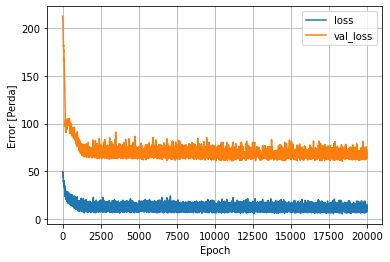

In [28]:
plot_loss(history)

In [29]:
dnn_model.evaluate(test_features, test_labels, verbose=0)

64.57940589057074

## Make predictions

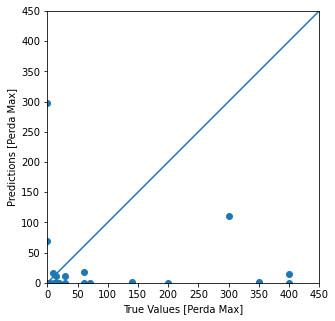

In [30]:
test_predictions = dnn_model.predict(test_features).flatten()
plt.rc('figure', figsize=(5, 5))
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Perda Max]')
plt.ylabel('Predictions [Perda Max]')
lims = [0, 450]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

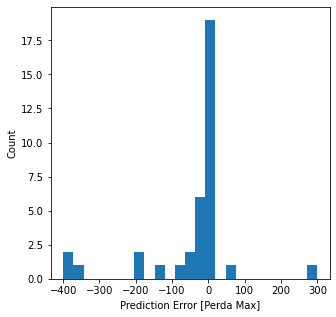

In [31]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Perda Max]')
_ = plt.ylabel('Count')